# PRCP-1018-BikeRental

## Problem Statement

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Prediction of daily bike rental count based on the environmental and seasonal settings.


### Dataset Description:
Bike sharing systems are a new version of traditional bike rentals where the whole process from membership, rental and return back has been automated. Through these systems, users are easily able to rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of the important events in the city could be detected via monitoring these data.


### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Reading the Datsets

In [2]:
df_daily =pd.read_csv('day_bike_rental.csv')

df_hourly =pd.read_csv('hour_bike_rental.csv')


### Basic Checks

**For Day-wise data**

In [3]:
df_daily.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
df_daily.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [5]:
df_daily.shape

(731, 16)

In [6]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df_daily.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

**For Hour-wise Data**

In [8]:
df_hourly.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [9]:
df_hourly.tail()

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49

In [10]:
df_hourly.shape

(17379, 17)

In [11]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
df_hourly.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

**Attribute Information:**
Both the files df_rental_hour and df_rental_day have the following fields, except hr which is not available in df_rental_day
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if neither weekend nor holiday, it is 1; otherwise 0.
- weathersit : Weather Conditons as follows:
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Data Manipulation and Cleaning

**Renaming the features from both the datasets for better understanding**

In [13]:
df_hourly.rename(columns={"instant":"record_index","hr":"hour","dteday":"day_date", "yr":"year", "temp":"temp_hr",
                          "mnth":"month", "weathersit":"weather_sit","hum":"humidity_hr", "atemp":"feel_temp_hr","windspeed":"windspeed_hr","casual":"casual_hr", 
                         "registered":"registered_hr", "cnt": "count_hr" }, inplace=True)

In [14]:
df_hourly.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'hour',
       'holiday', 'weekday', 'workingday', 'weather_sit', 'temp_hr',
       'feel_temp_hr', 'humidity_hr', 'windspeed_hr', 'casual_hr',
       'registered_hr', 'count_hr'],
      dtype='object')

In [15]:
df_daily.rename(columns={"instant":"record_index","dteday":"day_date", "yr":"year", "temp":"temp_daily",
                          "mnth":"month", "weathersit":"weather_sit","windspeed":"windspeed_daily", 'casual':'casual_daily',"hum":"humidity_daily", "atemp":"feel_temp_daily", 
                          "registered":"registered_daily", "cnt": "count_daily" }, inplace=True)

In [16]:
df_daily.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather_sit', 'temp_daily', 'feel_temp_daily',
       'humidity_daily', 'windspeed_daily', 'casual_daily', 'registered_daily',
       'count_daily'],
      dtype='object')

**Riverting back normalised Temperatures values to regular values**

In [17]:
#temp = ((t_max-t_min)*norm_temp)+t_min
#t_max= 39 
#t_min= -8............
#temp= (norm_temp*47)-8

In [18]:
temp_hr = (df_hourly['temp_hr']*47)-8
feel_temp_hr = (df_hourly['feel_temp_hr']*47)-8

In [19]:
df_hourly['temp_hr']= temp_hr
df_hourly['feel_temp_hr'] = feel_temp_hr
df_hourly.head(2)

record_index    day_date  season  year  month  hour  holiday  weekday  \
0             1  2011-01-01       1     0      1     0        0        6   
1             2  2011-01-01       1     0      1     1        0        6   

   workingday  weather_sit  temp_hr  feel_temp_hr  humidity_hr  windspeed_hr  \
0           0            1     3.28        5.5313         0.81           0.0   
1           0            1     2.34        4.8169         0.80           0.0   

   casual_hr  registered_hr  count_hr  
0          3             13        16  
1          8             32        40

In [20]:
temp_daily = (df_daily['temp_daily']*47)-8
feel_temp_daily = (df_daily['feel_temp_daily']*47)-8

In [21]:
df_daily['temp_daily']= temp_daily
df_daily['feel_temp_daily'] = feel_temp_daily
df_daily.head(2)

record_index    day_date  season  year  month  holiday  weekday  \
0             1  2011-01-01       1     0      1        0        6   
1             2  2011-01-02       1     0      1        0        0   

   workingday  weather_sit  temp_daily  feel_temp_daily  humidity_daily  \
0           0            2    8.175849         9.090375        0.805833   
1           0            2    9.083466         8.625733        0.696087   

   windspeed_daily  casual_daily  registered_daily  count_daily  
0         0.160446           331               654          985  
1         0.248539           131               670          801

- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)

In [22]:
humidity_hr= df_hourly['humidity_hr']*100
humidity_daily= df_daily['humidity_daily']*100

In [23]:
windspeed_hr = df_hourly['windspeed_hr']*67
windspeed_daily = df_daily['windspeed_daily']*67

In [24]:
df_daily['humidity_daily']= humidity_daily
df_daily['windspeed_daily'] = windspeed_daily
df_daily.head(2)

record_index    day_date  season  year  month  holiday  weekday  \
0             1  2011-01-01       1     0      1        0        6   
1             2  2011-01-02       1     0      1        0        0   

   workingday  weather_sit  temp_daily  feel_temp_daily  humidity_daily  \
0           0            2    8.175849         9.090375         80.5833   
1           0            2    9.083466         8.625733         69.6087   

   windspeed_daily  casual_daily  registered_daily  count_daily  
0        10.749882           331               654          985  
1        16.652113           131               670          801

In [25]:
df_hourly['humidity_hr']= humidity_hr
df_hourly['windspeed_hr'] = windspeed_hr
df_hourly.head(2)

record_index    day_date  season  year  month  hour  holiday  weekday  \
0             1  2011-01-01       1     0      1     0        0        6   
1             2  2011-01-01       1     0      1     1        0        6   

   workingday  weather_sit  temp_hr  feel_temp_hr  humidity_hr  windspeed_hr  \
0           0            1     3.28        5.5313         81.0           0.0   
1           0            1     2.34        4.8169         80.0           0.0   

   casual_hr  registered_hr  count_hr  
0          3             13        16  
1          8             32        40

**Converting some of the continuous features into categorical features for better Data Analysis**

In [26]:
df_hourly['day_period'] = pd.cut(x=df_hourly['hour'], bins=[0, 5, 11, 17, 23],
                    labels=["Night", 'Morning', 'Afternoon',
                            'Evening'], include_lowest=True)

In [27]:
df_hourly['year'].replace([0,1],['2011', '2012'], inplace=True)
df_hourly['season'].replace([1,2,3,4],['Winter', 'Spring', 'Summer', 'Fall'], inplace=True)
df_hourly['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May', 
                                                              'June','July','August','September', 'October',
                                                              'November', 'December'], inplace=True)
df_hourly['weekday'].replace([0,1,2,3,4,5,6],["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"], inplace=True)
df_hourly['holiday'].replace([0,1],['No_Holiday', 'Holiday'], inplace=True)
df_hourly['workingday'].replace([0,1],["No_Working_Day","Working_Day"], inplace=True)
df_hourly['weather_sit'].replace([1,2,3,4],['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light_Snow/Rain', 'Heavy_Rain/Snow/Storm'], inplace=True)
df_hourly['hour'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ['12AM-1AM', '1AM-2AM','2AM-3AM','3AM-4AM','4AM-5AM','5AM-6AM','6AM-7AM', '7AM-8AM', '8AM-9AM', '9AM-10AM', '10AM-11AM', '11AM-12PM','12PM-1PM', '1PM-2PM','2PM-3PM','3PM-4PM','4PM-5PM','5PM-6PM','6PM-7PM', '7PM-8PM', '8PM-9PM', '9PM-10PM', '10PM-11PM', '11PM-12AM'],inplace=True)
df_hourly.head()

record_index    day_date  season  year    month      hour     holiday  \
0             1  2011-01-01  Winter  2011  January  12AM-1AM  No_Holiday   
1             2  2011-01-01  Winter  2011  January   1AM-2AM  No_Holiday   
2             3  2011-01-01  Winter  2011  January   2AM-3AM  No_Holiday   
3             4  2011-01-01  Winter  2011  January   3AM-4AM  No_Holiday   
4             5  2011-01-01  Winter  2011  January   4AM-5AM  No_Holiday   

    weekday      workingday          weather_sit  temp_hr  feel_temp_hr  \
0  Saturday  No_Working_Day  Clear/Partly Cloudy     3.28        5.5313   
1  Saturday  No_Working_Day  Clear/Partly Cloudy     2.34        4.8169   
2  Saturday  No_Working_Day  Clear/Partly Cloudy     2.34        4.8169   
3  Saturday  No_Working_Day  Clear/Partly Cloudy     3.28        5.5313   
4  Saturday  No_Working_Day  Clear/Partly Cloudy     3.28        5.5313   

   humidity_hr  windspeed_hr  casual_hr  registered_hr  count_hr day_period  
0         81.0           0.0          3             13        16      Night  
1         80.0           0.0          8             32        40      Night  
2         80.0           0.0          5             27        32      Night  
3         75.0           0.0          3             10        13      Night  
4         75.0           0.0          0              1         1      Night

In [28]:
df_hourly.describe(include="O")

day_date  season   year  month     hour     holiday   weekday  \
count        17379   17379  17379  17379    17379       17379     17379   
unique         731       4      2     12       24           2         7   
top     2011-01-01  Summer   2012    May  5PM-6PM  No_Holiday  Saturday   
freq            24    4496   8734   1488      730       16879      2512   

         workingday          weather_sit  
count         17379                17379  
unique            2                    4  
top     Working_Day  Clear/Partly Cloudy  
freq          11865                11413

In [29]:
df_hourly.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'hour',
       'holiday', 'weekday', 'workingday', 'weather_sit', 'temp_hr',
       'feel_temp_hr', 'humidity_hr', 'windspeed_hr', 'casual_hr',
       'registered_hr', 'count_hr', 'day_period'],
      dtype='object')

In [30]:
df_hourly['temp_ranges'] = pd.cut(x=df_hourly['temp_hr'], bins=[-8, 4, 8, 13, 18, 25, 29, 35, 41],
                    labels=["Very Cold", 'Cold', 'Cool','Slightly Cool', 'Comfortable','Slightly warm','Warm', 'Hot'], include_lowest=True)

In [31]:
df_daily['year'].replace([0,1],['2011', '2012'], inplace=True)
df_daily['season'].replace([1,2,3,4],['Winter', 'Spring', 'Summer', 'Fall'], inplace=True)
df_daily['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May', 
                                                              'June','July','August','September', 'October',
                                                              'November', 'December'], inplace=True)
df_daily['weekday'].replace([0,1,2,3,4,5,6],["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"], inplace=True)
df_daily['holiday'].replace([0,1],['No_Holiday', 'Holiday'], inplace=True)
df_daily['workingday'].replace([0,1],["No_Working_Day","Working_Day"], inplace=True)
df_daily['weather_sit'].replace([1,2,3,4],['Clear/Partly_Cloudy', 'Mist/Cloudy', 'Light_Snow/Rain', 'Heavy_Rain/Snow/Storm'], inplace=True)
df_daily.head()

record_index    day_date  season  year    month     holiday    weekday  \
0             1  2011-01-01  Winter  2011  January  No_Holiday   Saturday   
1             2  2011-01-02  Winter  2011  January  No_Holiday     Sunday   
2             3  2011-01-03  Winter  2011  January  No_Holiday     Monday   
3             4  2011-01-04  Winter  2011  January  No_Holiday    Tuesday   
4             5  2011-01-05  Winter  2011  January  No_Holiday  Wednesday   

       workingday          weather_sit  temp_daily  feel_temp_daily  \
0  No_Working_Day          Mist/Cloudy    8.175849         9.090375   
1  No_Working_Day          Mist/Cloudy    9.083466         8.625733   
2     Working_Day  Clear/Partly_Cloudy    1.229108         0.902035   
3     Working_Day  Clear/Partly_Cloudy    1.400000         1.969734   
4     Working_Day  Clear/Partly_Cloudy    2.666979         2.775690   

   humidity_daily  windspeed_daily  casual_daily  registered_daily  \
0         80.5833        10.749882           331               654   
1         69.6087        16.652113           131               670   
2         43.7273        16.636703           120              1229   
3         59.0435        10.739832           108              1454   
4         43.6957        12.522300            82              1518   

   count_daily  
0          985  
1          801  
2         1349  
3         1562  
4         1600

In [32]:
df_daily.describe(include="O")

day_date  season  year    month     holiday   weekday   workingday  \
count          731     731   731      731         731       731          731   
unique         731       4     2       12           2         7            2   
top     2011-01-01  Summer  2012  January  No_Holiday  Saturday  Working_Day   
freq             1     188   366       62         710       105          500   

                weather_sit  
count                   731  
unique                    3  
top     Clear/Partly_Cloudy  
freq                    463

## Exploratory Data Analysis

- Impact of whether the day is working day or not on Daily count.
- Impact of whether it's weekday or weekend or holiday on daily count.
- Month Wise Total Count of rentals
- Year wise total count
- Seasonal Impact on daily count with hue as year 0 and 1
- Feel temp and Normal Temp Relationship and it's impact on active users
- Does windspeed impact the active users
- Does humidity impact the sctive users 
- Normal Temperature impact on Daily Count
- Percentage of Registered and Casual users out of Total count.
- Hour wise total count and impact of weather situation
- When do we see more casual users (on holidays or Weekend or working days)

### Distribution plot for Numerical Features

In [33]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   record_index      731 non-null    int64  
 1   day_date          731 non-null    object 
 2   season            731 non-null    object 
 3   year              731 non-null    object 
 4   month             731 non-null    object 
 5   holiday           731 non-null    object 
 6   weekday           731 non-null    object 
 7   workingday        731 non-null    object 
 8   weather_sit       731 non-null    object 
 9   temp_daily        731 non-null    float64
 10  feel_temp_daily   731 non-null    float64
 11  humidity_daily    731 non-null    float64
 12  windspeed_daily   731 non-null    float64
 13  casual_daily      731 non-null    int64  
 14  registered_daily  731 non-null    int64  
 15  count_daily       731 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory us

In [34]:
df_eda_dist = df_daily[['humidity_daily', 'windspeed_daily', 'casual_daily', 'registered_daily', 'count_daily', 'temp_daily','feel_temp_daily']]

<Figure size 640x480 with 0 Axes>

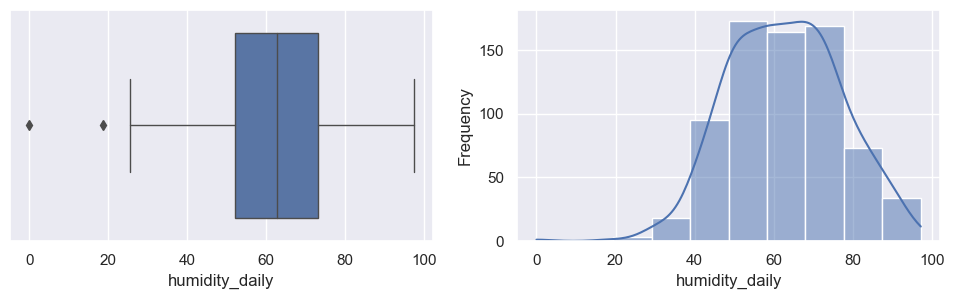

<Figure size 1200x300 with 0 Axes>

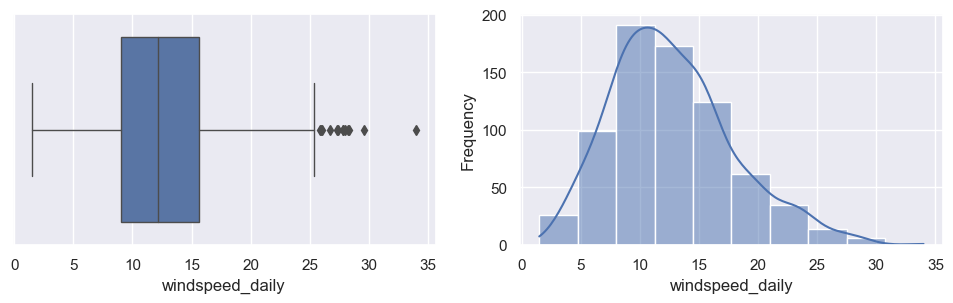

<Figure size 1200x300 with 0 Axes>

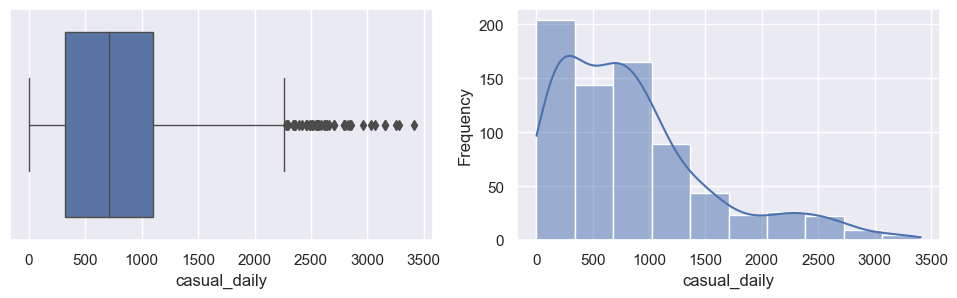

<Figure size 1200x300 with 0 Axes>

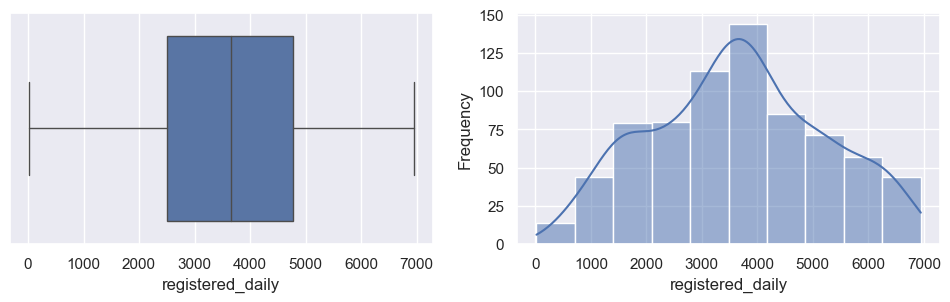

<Figure size 1200x300 with 0 Axes>

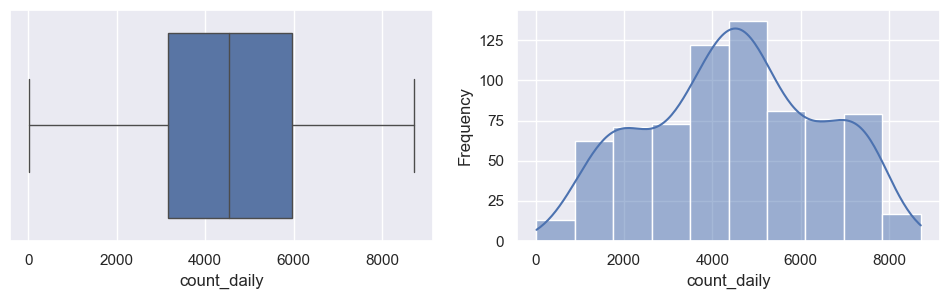

<Figure size 1200x300 with 0 Axes>

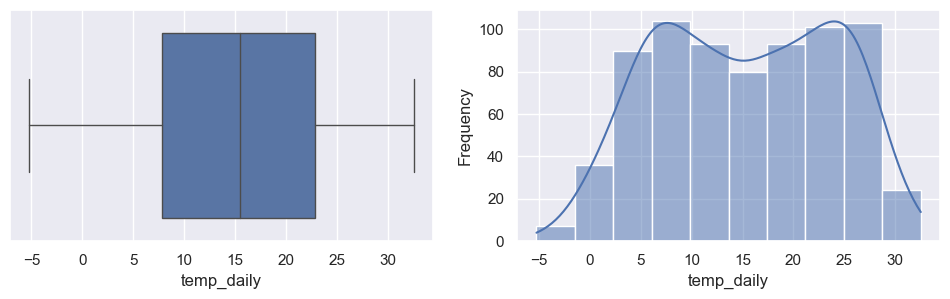

<Figure size 1200x300 with 0 Axes>

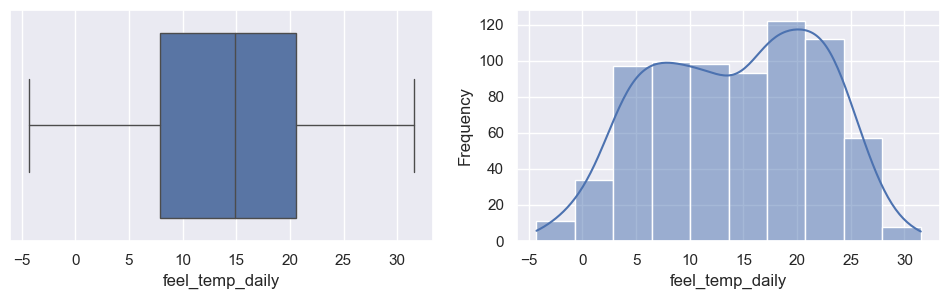

In [35]:
for i in df_eda_dist.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(12,3)})
    
    f, (ax_box, ax_hist) = plt.subplots(1,2, sharex=True)
    plt.gca().set(xlabel = i, ylabel='Frequency')
    sns.boxplot(df_eda_dist[i], ax=ax_box, linewidth = 1.0)
    sns.histplot(df_eda_dist[i], ax=ax_hist, bins= 10, kde=True)
    plt.show()

### Year-wise Total count of Bike Rentals

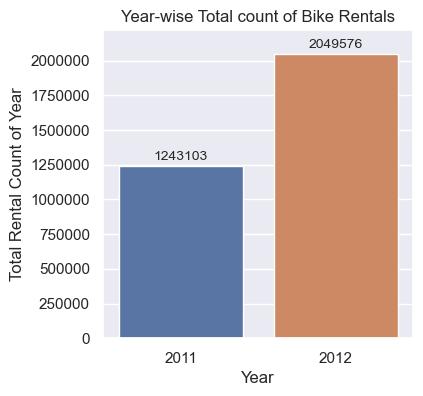

In [36]:
plt.figure(figsize=(4,4))
ax= sns.barplot(data=df_daily,x="year", y="count_daily", estimator=sum,  errwidth=0)
ax.set(title= "Year-wise Total count of Bike Rentals", ylabel='Total Rental Count of Year', xlabel='Year')
plt.ticklabel_format(style='plain', axis='y')
for i in ax.containers:
    ax.bar_label(i, fmt = '%d', padding=1.8, fontsize=10)

### Month-wise Total count of Bike Rentals in 2011 and 2012 and it's percentage 

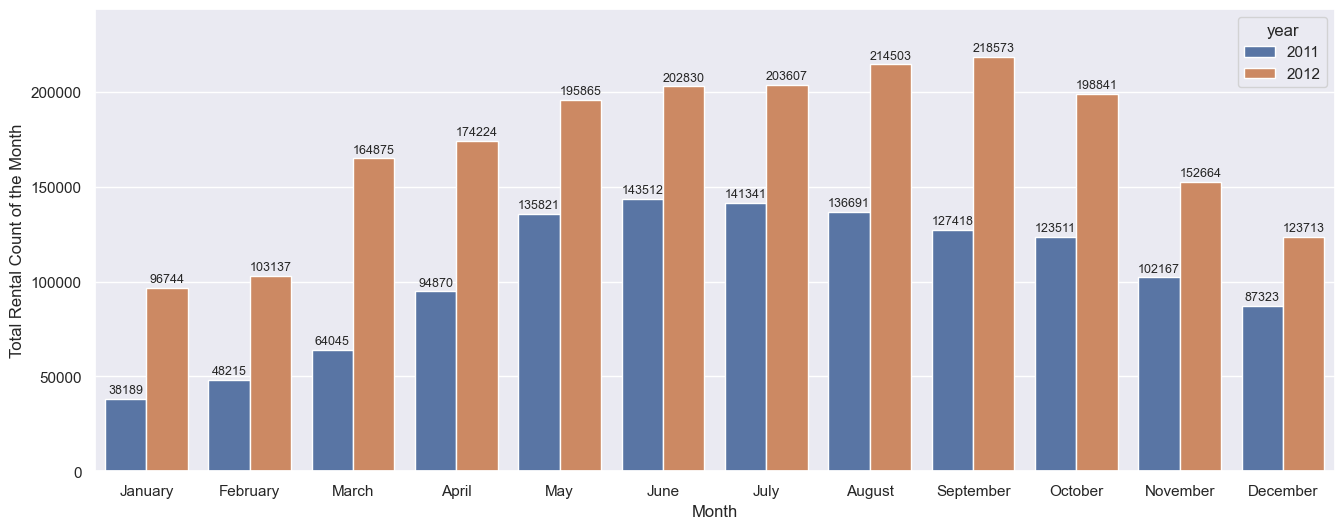

In [37]:
plt.figure(figsize=(16,6))
ax= sns.barplot(data=df_hourly,x="month", y="count_hr", hue='year', estimator=sum,  errwidth=0)
ax.set(ylabel='Total Rental Count of the Month', xlabel='Month')
for i in ax.containers:
    ax.bar_label(i, padding=1.8, fontsize=9)

In [38]:
#Percentage of Total Count Month Wise
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=df_daily.query("year=='2011'")['count_daily'], labels=df_daily.query("year=='2011'")['month']),
              1, 1)
fig.add_trace(go.Pie(values=df_daily.query("year=='2012'")['count_daily'], labels=df_daily.query("year=='2012'")['month']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.3, hoverinfo="label+percent")
fig.update_layout(
    title_text="Percentage of Total Rental Counts Month-wise",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2011', x=0.19, y=0.5, font_size=20, showarrow=False),
                 dict(text='2012', x=0.81, y=0.5, font_size=20, showarrow=False)])

### Season-wise total Count in Year 2011 and 2012 and it's percentage

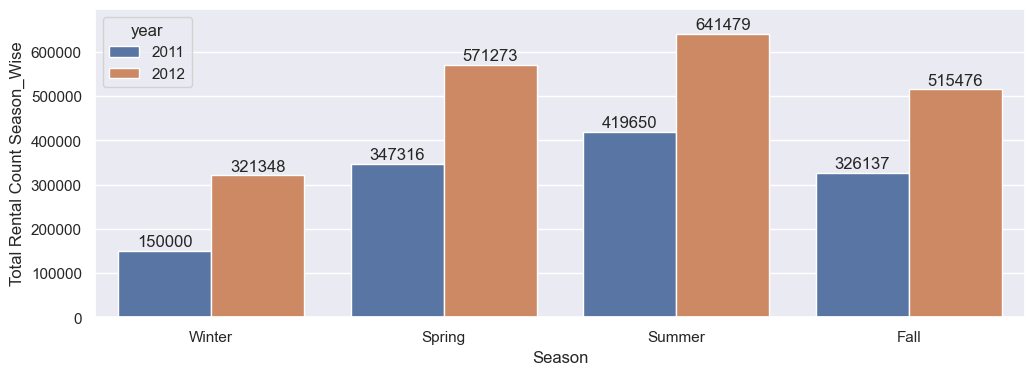

In [39]:
plt.figure(figsize=(12,4))
ax= sns.barplot(data=df_hourly, x="season", y="count_hr", hue='year', estimator=sum, errwidth=0)
ax.set(ylabel='Total Rental Count Season_Wise', xlabel='Season')
for i in ax.containers:
    ax.bar_label(i, padding=1.0)

In [40]:

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=df_daily.query("year=='2011'")['count_daily'], labels=df_daily.query("year=='2011'")['season']),
              1, 1)
fig.add_trace(go.Pie(values=df_daily.query("year=='2012'")['count_daily'], labels=df_daily.query("year=='2012'")['season']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.3, hoverinfo="label+percent")
fig.update_layout(
    title_text="Percentage of Total Rental Counts Season-wise",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2011',x=0.19, y=0.5,  font_size=20, showarrow=False),
                 dict(text='2012', x=0.81, y=0.5, font_size=20, showarrow=False)])

### Average Daily Count Season-Wise and Month Wise

[Text(0.5, 1.0, 'Line plot for Average Daily Count Vs Season')]

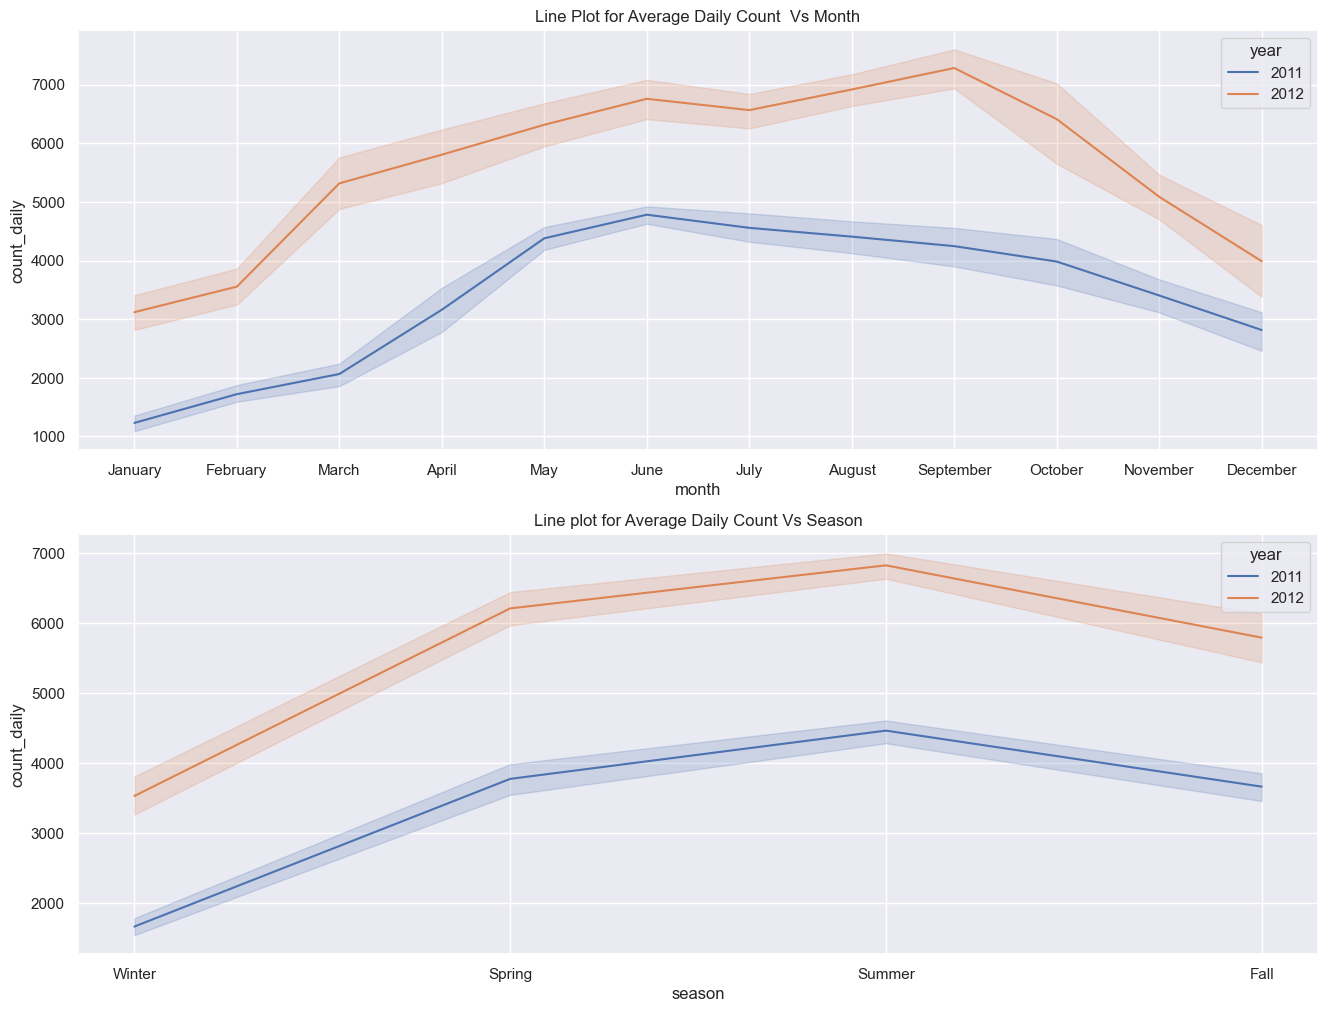

In [41]:
fig,axs = plt.subplots(2,1, figsize = (16,12))
sns.lineplot(data=df_daily, x="month", y="count_daily",  hue='year', ax=axs[0]).set(title="Line Plot for Average Daily Count  Vs Month")
sns.lineplot(data=df_daily, x="season", y="count_daily", hue='year', ax=axs[1]).set(title="Line plot for Average Daily Count Vs Season")

### Average Hourly Rental Count Season-Wise and Month Wise

[Text(0.5, 1.0, 'Line plot for Average Hourly Count Vs Season')]

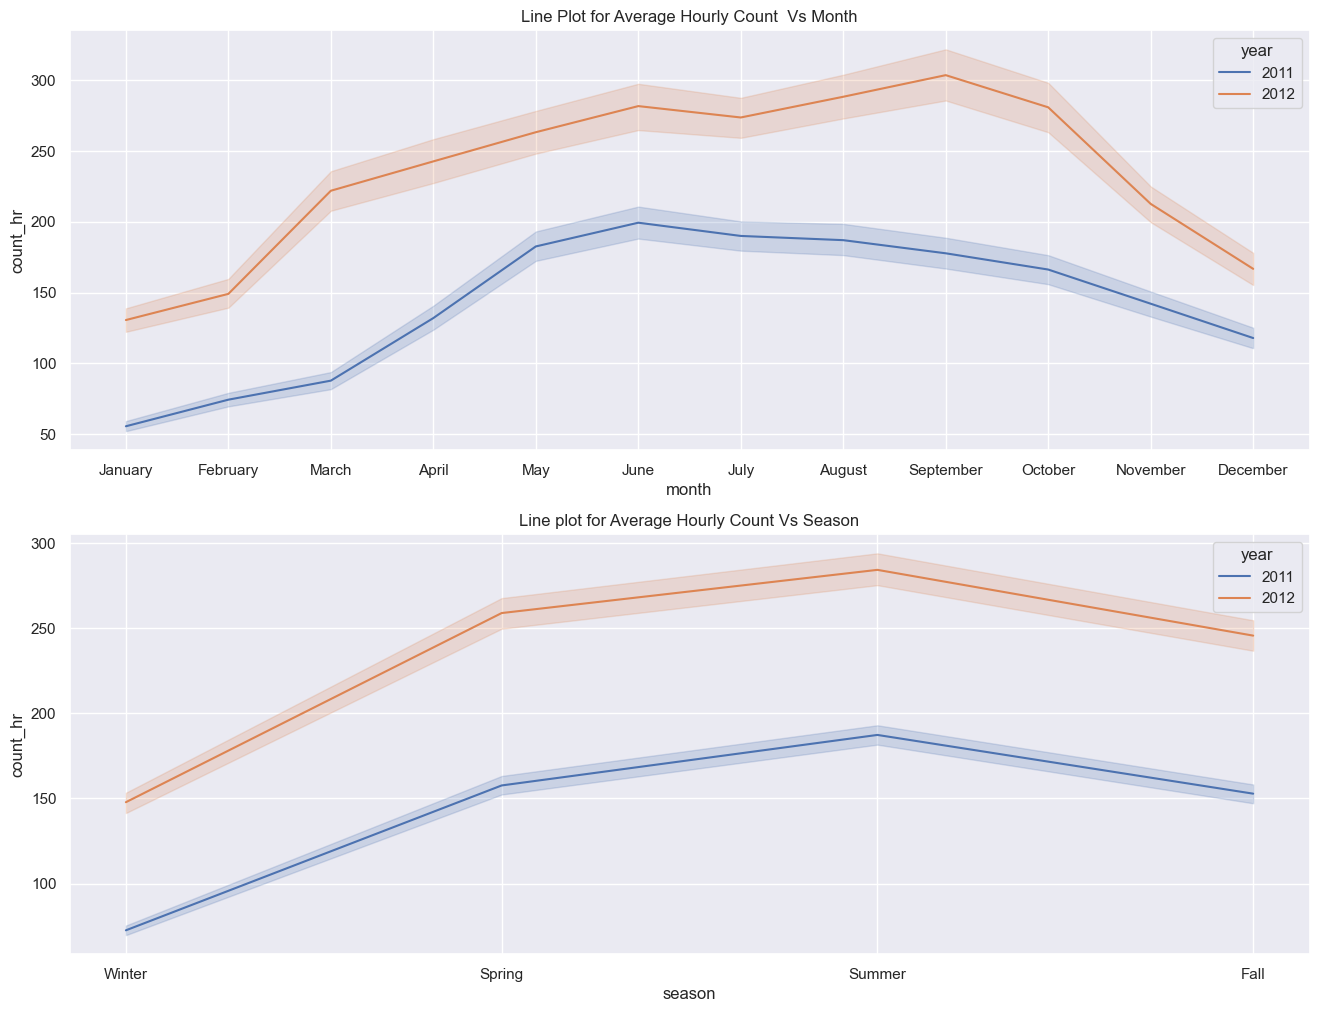

In [42]:
fig,axs = plt.subplots(2,1, figsize = (16,12))
sns.lineplot(data=df_hourly, x="month", y="count_hr",  hue='year', ax=axs[0]).set(title="Line Plot for Average Hourly Count  Vs Month")
sns.lineplot(data=df_hourly, x="season", y="count_hr", hue='year', ax=axs[1]).set(title="Line plot for Average Hourly Count Vs Season")

### Average Hourly Rentals according to Period of the Day

<AxesSubplot:xlabel='day_period', ylabel='count_hr'>

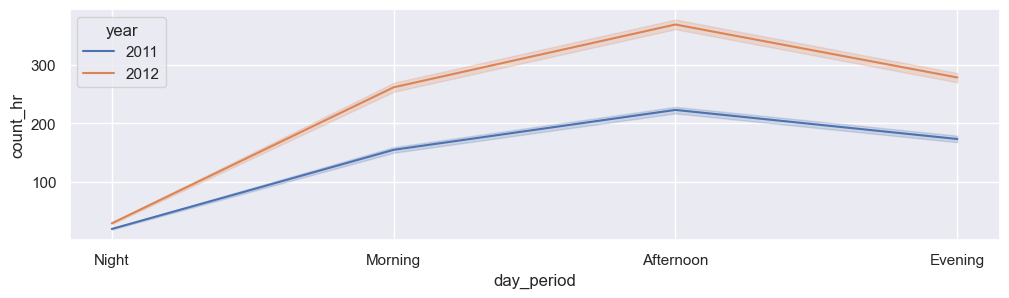

In [43]:
sns.lineplot(data=df_hourly, x="day_period", y="count_hr", hue='year')

### Average Daily Rental Counts on Different Days

[Text(0, 0.5, 'Average Registered Rentals'), Text(0.5, 0, '')]

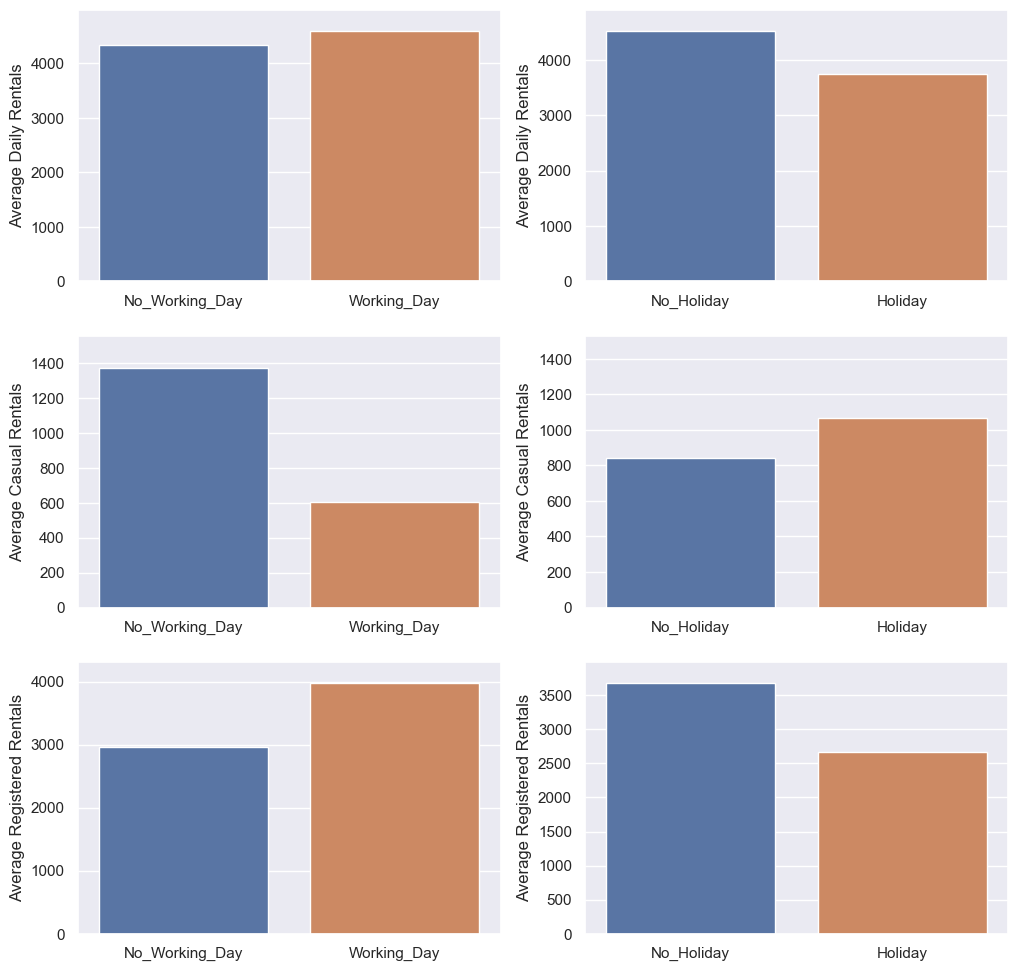

In [44]:
fig, ax = plt.subplots(3,2, figsize=(12, 12))
sns.barplot(x="workingday",  y="count_daily", data=df_daily,errwidth=0, ax=ax[0,0]).set(ylabel='Average Daily Rentals', xlabel='')
sns.barplot(x="holiday",  y="count_daily", data=df_daily, errwidth=0, ax=ax[0, 1]).set(ylabel='Average Daily Rentals', xlabel='')

sns.barplot(x="workingday",  y="casual_daily", data=df_daily,errwidth=0, ax=ax[1,0]).set(ylabel='Average Casual Rentals', xlabel='')
sns.barplot(x="holiday",  y="casual_daily", data=df_daily, errwidth=0, ax=ax[1, 1]).set(ylabel='Average Casual Rentals', xlabel='')

sns.barplot(x="workingday",  y="registered_daily", data=df_daily,errwidth=0, ax=ax[2,0]).set(ylabel='Average Registered Rentals', xlabel='')
sns.barplot(x="holiday",  y="registered_daily", data=df_daily, errwidth=0, ax=ax[2, 1]).set(ylabel='Average Registered Rentals', xlabel='')

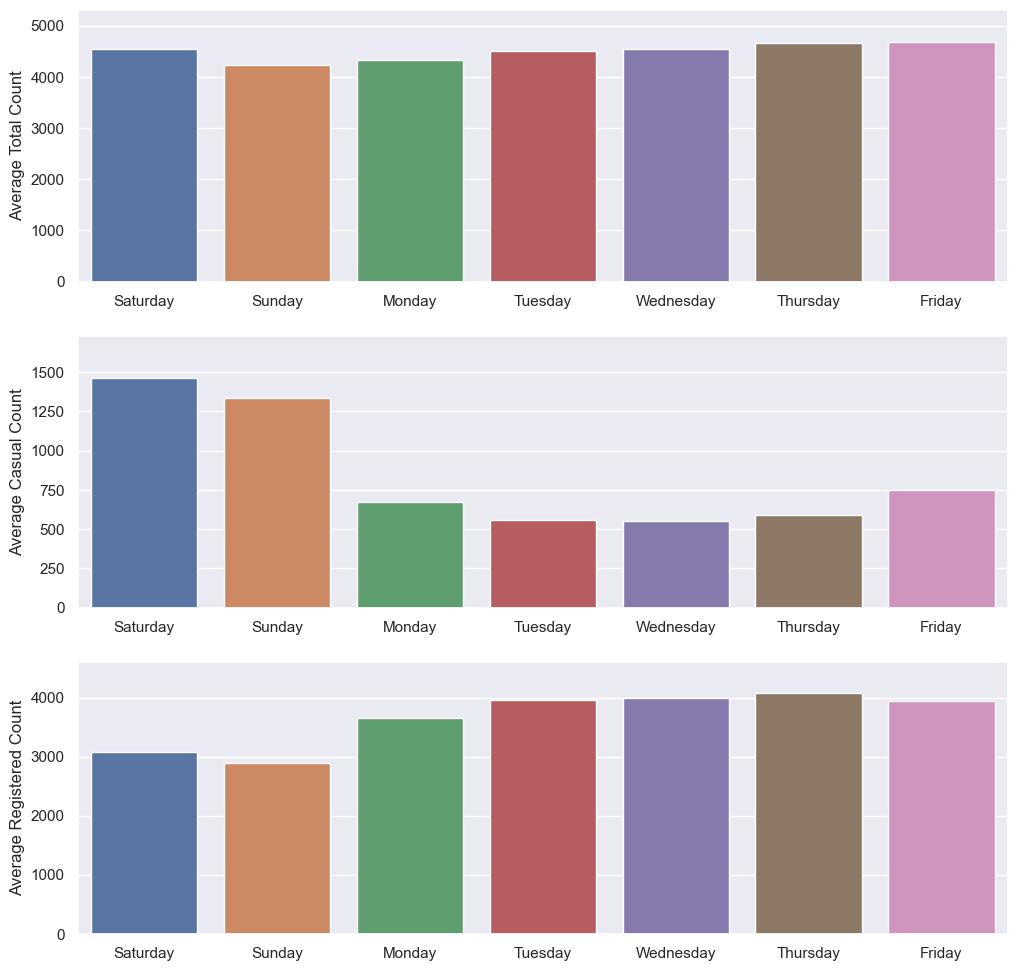

In [45]:
fig, axs = plt.subplots(3,1, figsize=(12, 12))
sns.barplot(x="weekday",  y="count_daily", data=df_daily, errwidth=0, ax=axs[0]).set(ylabel='Average Total Count', xlabel='')
sns.barplot(x="weekday",  y="casual_daily", data=df_daily, errwidth=0, ax=axs[1]).set(ylabel='Average Casual Count', xlabel='')
ax=sns.barplot(x="weekday",  y="registered_daily", data=df_daily, errwidth=0, ax=axs[2]).set(ylabel='Average Registered Count', xlabel='')

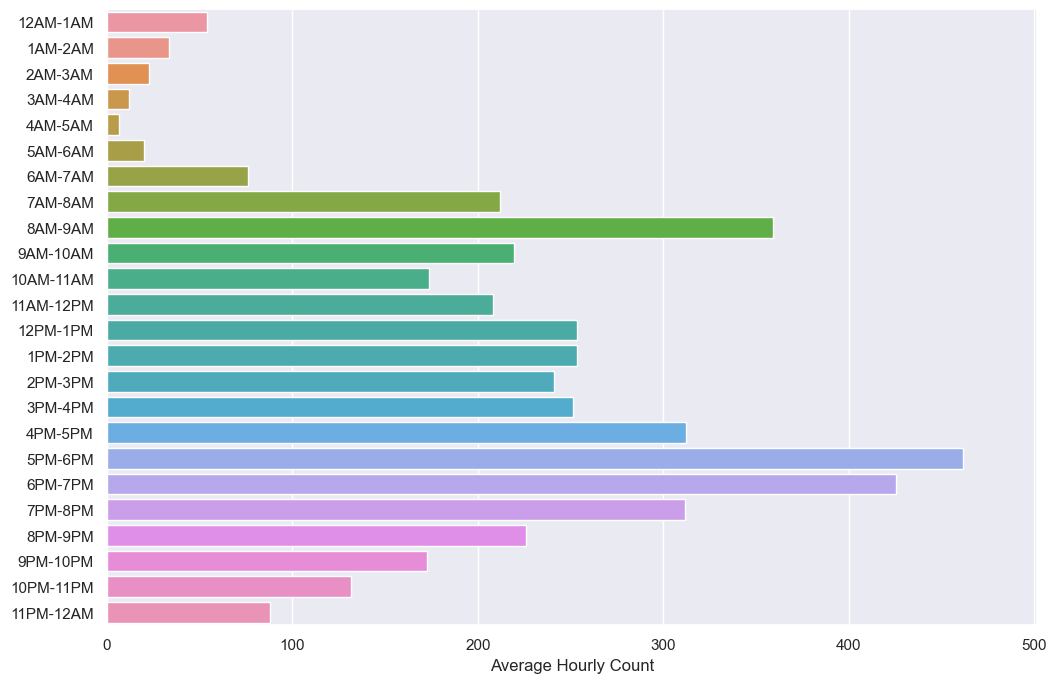

In [46]:
plt.figure(figsize=(12,8))
ax= sns.barplot( data=df_hourly, y="hour",  x="count_hr", errwidth=0).set(xlabel='Average Hourly Count', ylabel='')

### Average Hourly rental count according to Weather Situation

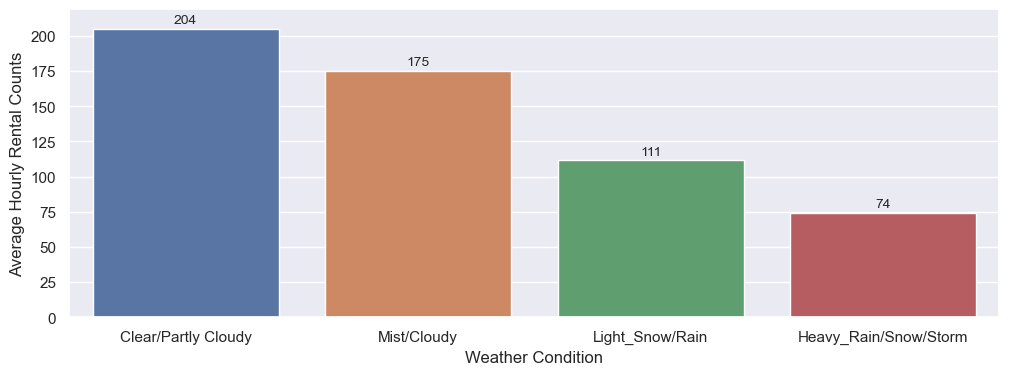

In [47]:
plt.figure(figsize=(12,4))
ax= sns.barplot(x="weather_sit",  y="count_hr", data=df_hourly, errwidth=0)
ax.set(ylabel='Average Hourly Rental Counts', xlabel='Weather Condition')
for i in ax.containers:
    ax.bar_label(i, fmt = '%d', padding=1.8, fontsize=10)

In [48]:
df_daily.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather_sit', 'temp_daily', 'feel_temp_daily',
       'humidity_daily', 'windspeed_daily', 'casual_daily', 'registered_daily',
       'count_daily'],
      dtype='object')

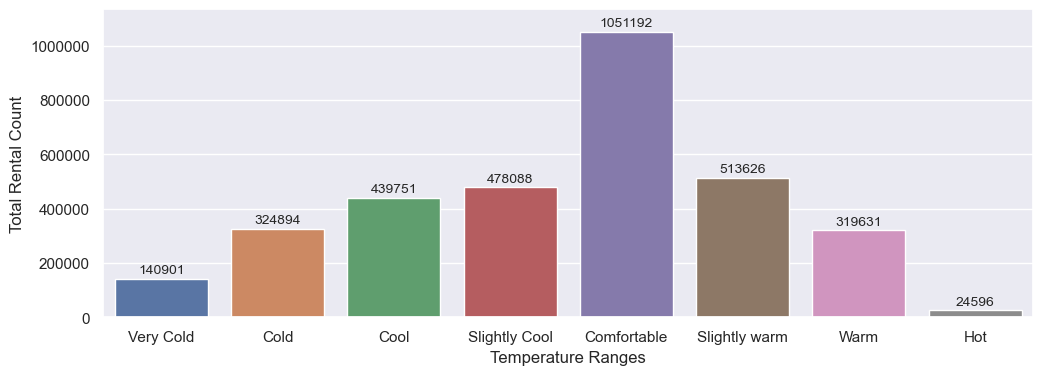

In [49]:
plt.figure(figsize=(12,4))
ax= sns.barplot(data=df_hourly, x="temp_ranges", y="count_hr" , estimator =sum, errwidth=0)
ax.set(ylabel='Total Rental Count', xlabel='Temperature Ranges')
plt.ticklabel_format(style='plain', axis='y')
for i in ax.containers:
    ax.bar_label(i, fmt = '%d', padding=1.8, fontsize=10)

**Temperature Ranges**

- Below 4.1 --- Very Cold
- 4.1 to 8.0 --- Cold
- 8.1 to 13.0 --- Cool
- 13.1 to 18.0 --- Slightly Cool
- 18.1 to 25.0 --- Comfortable
- 25.1 to 29.0 --- Slightly Warm
- 29.1 to 35.0 --- Warm
- 35.1 to 41.0 --- Hot

In [50]:
df_daily.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather_sit', 'temp_daily', 'feel_temp_daily',
       'humidity_daily', 'windspeed_daily', 'casual_daily', 'registered_daily',
       'count_daily'],
      dtype='object')

In [51]:
import plotly.express as px

fig = px.scatter(df_daily.query("year=='2011'"), x="temp_daily", y="count_daily", color="season", size='humidity_daily',
                 hover_name="day_date", log_x=True, size_max=15)
fig.show()

In [52]:
import plotly.express as px

fig = px.scatter(df_daily.query("year=='2012'"), x="temp_daily", y="count_daily", size='humidity_daily',
	         color="season",
                 hover_name="day_date", log_x=True, size_max=15)
fig.show()

In [53]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

table_data = df_daily.groupby(by='season')['casual_daily', 'registered_daily', 'count_daily'].sum().reset_index()
table_data.rename(columns={"casual_daily":'casual', "registered_daily":"registered", 
                           "count_daily":"total"}, inplace=True)

fig=ff.create_table(table_data, height_constant=60)


trace1 = go.Scatter(x=table_data['season'], y=table_data['casual'],
                    marker=dict(color='#0099ff'),
                    name='Casual Rentals',
                    xaxis='x2', yaxis='y2')
trace2 = go.Scatter(x=table_data['season'], y=table_data['registered'],
                    marker=dict(color='#404040'),
                    name='Registered Rentals',
                    xaxis='x2', yaxis='y2')
trace3 = go.Scatter(x=table_data['season'], y=table_data['total'],
                    marker=dict(color='#FF0000'),
                    name='Total Rentals',
                    xaxis='x2', yaxis='y2')

fig.add_traces([trace1, trace2, trace3])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.xaxis.update({'domain': [0, .5]})
fig.layout.xaxis2.update({'domain': [0.6, 1.0]})

# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Rental Count'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':50, 'b':100})
fig.layout.update({'title': 'Season-Wise Bike Rentals'})

fig.show()

## Data Preprocessing 

**Checking for Outliers**

In [54]:
df_daily.isnull().sum()

record_index        0
day_date            0
season              0
year                0
month               0
holiday             0
weekday             0
workingday          0
weather_sit         0
temp_daily          0
feel_temp_daily     0
humidity_daily      0
windspeed_daily     0
casual_daily        0
registered_daily    0
count_daily         0
dtype: int64

There are no Missing Values

## Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

Techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

### Visual exploration of relationship between variables
- Continuous Vs Continuous ---- Scatter Plot
- Categorical Vs Continuous---- Box Plot
- Categorical Vs Categorical---- Grouped Bar Plots

### Statistical measurement of relationship strength between variables
- Continuous Vs Continuous ---- Correlation matrix
- Categorical Vs Continuous---- ANOVA test
- Categorical Vs Categorical--- Chi-Square test


 In this case study the Target variable is Continuous, hence below two scenarios will be present
- Continuous Target Variable Vs Continuous Predictor
- Continuous Target Variable Vs Categorical Predicto

### Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

In [55]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   record_index   17379 non-null  int64   
 1   day_date       17379 non-null  object  
 2   season         17379 non-null  object  
 3   year           17379 non-null  object  
 4   month          17379 non-null  object  
 5   hour           17379 non-null  object  
 6   holiday        17379 non-null  object  
 7   weekday        17379 non-null  object  
 8   workingday     17379 non-null  object  
 9   weather_sit    17379 non-null  object  
 10  temp_hr        17379 non-null  float64 
 11  feel_temp_hr   17379 non-null  float64 
 12  humidity_hr    17379 non-null  float64 
 13  windspeed_hr   17379 non-null  float64 
 14  casual_hr      17379 non-null  int64   
 15  registered_hr  17379 non-null  int64   
 16  count_hr       17379 non-null  int64   
 17  day_period     17379 non-null  

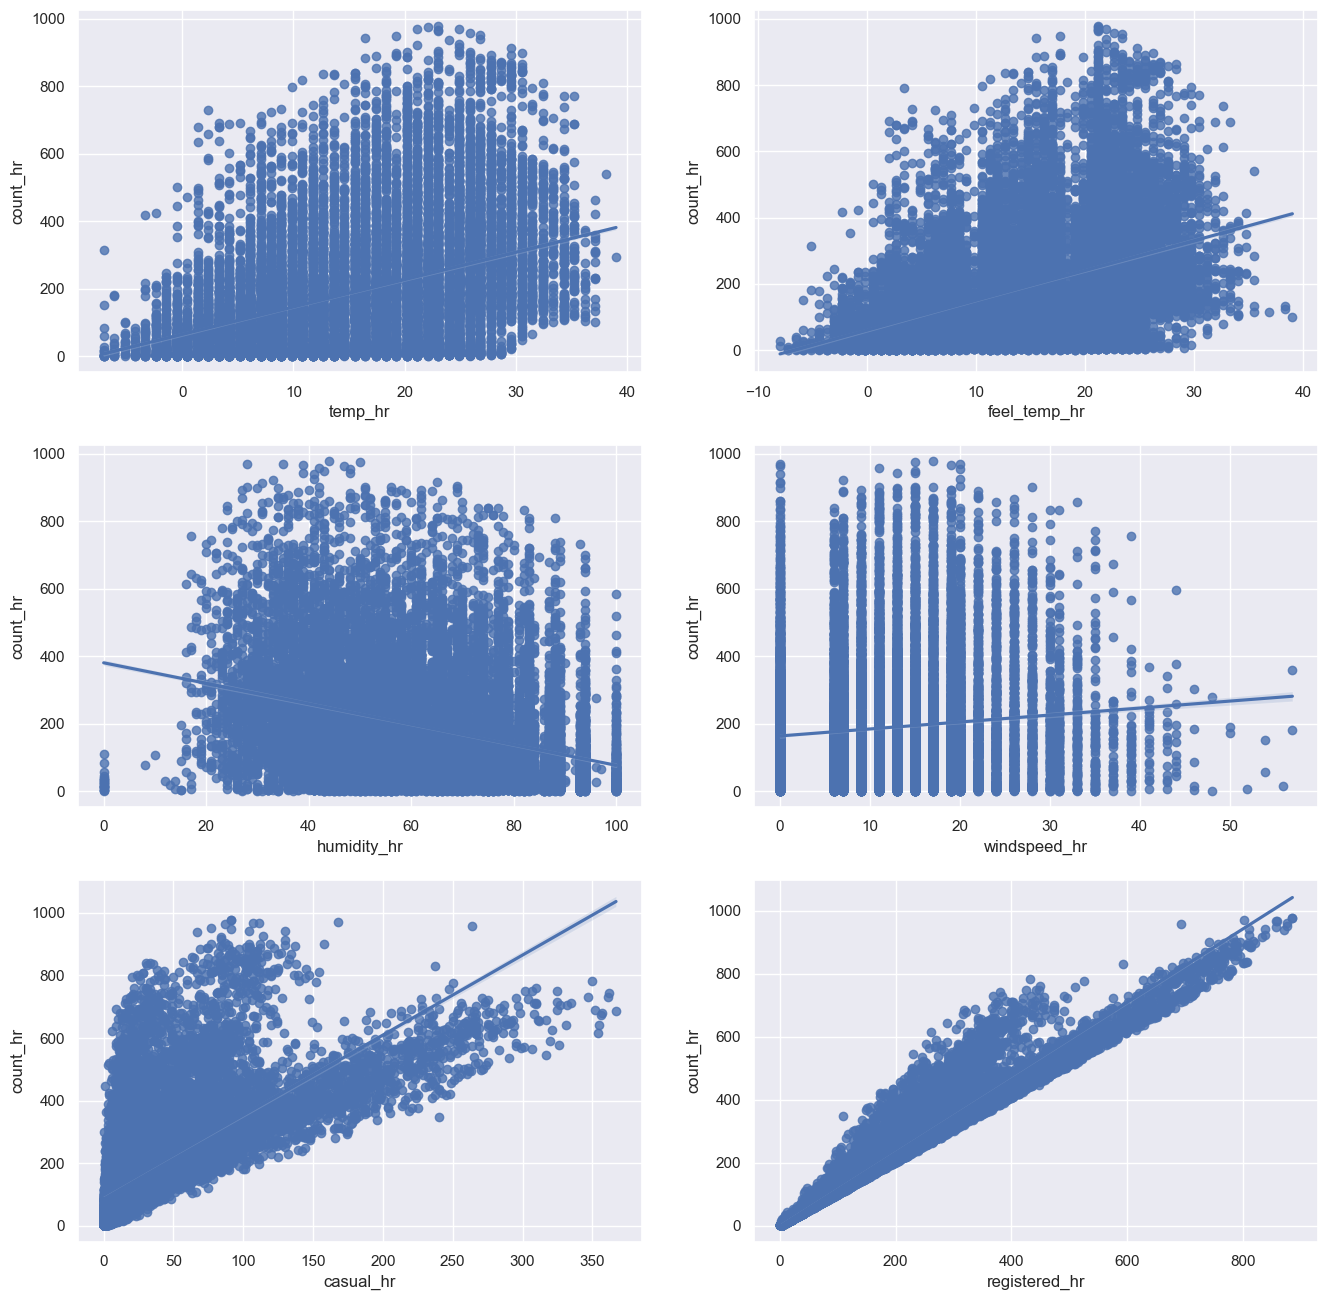

<Figure size 1200x300 with 0 Axes>

In [56]:
# Plotting scatter chart for each predictor vs the target variable
plt.figure(figsize=(16,16))
plotnumber = 1
for columns in df_hourly[['temp_hr', 'feel_temp_hr', 'humidity_hr', 'windspeed_hr','casual_hr', 'registered_hr']]:
    plt.subplot(3,2,plotnumber)
    sns.regplot(x=columns, y='count_hr', data=df_hourly)
    plotnumber += 1
plt.show()
plt.tight_layout()
plt.show()

### Scatter charts interpretation
What should you look for in these scatter charts?

Trend. You should try to see if there is a visible trend or not. There could be three scenarios

- Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

- Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

- No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.

###### Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
Pearson's correlation coefficient can simply be calculated as the covariance between two features  x and  y
(numerator) divided by the product of their standard deviations (denominator):


- This value can be calculated only between two numeric columns
- Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
- Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
- Correlation near {0} means No relationship, the scatter plot will show no clear trend.
- If Correlation value between two variables is > 0.9 in magnitude, it indicates good relationship the sign does not matter
- We observe the correlations between Target variable and all other predictor variables(s) to check which -columns/features/predictors are actually related to the target variable in question

In [57]:
# Creating the correlation matrix
CorrelationData=df_hourly[['temp_hr','feel_temp_hr', 'humidity_hr', 'windspeed_hr','casual_hr', 'registered_hr', 'count_hr']].corr()
CorrelationData

temp_hr  feel_temp_hr  humidity_hr  windspeed_hr  casual_hr  \
temp_hr        1.000000      0.987672    -0.069881     -0.023125   0.459616   
feel_temp_hr   0.987672      1.000000    -0.051918     -0.062336   0.454080   
humidity_hr   -0.069881     -0.051918     1.000000     -0.290105  -0.347028   
windspeed_hr  -0.023125     -0.062336    -0.290105      1.000000   0.090287   
casual_hr      0.459616      0.454080    -0.347028      0.090287   1.000000   
registered_hr  0.335361      0.332559    -0.273933      0.082321   0.506618   
count_hr       0.404772      0.400929    -0.322911      0.093234   0.694564   

               registered_hr  count_hr  
temp_hr             0.335361  0.404772  
feel_temp_hr        0.332559  0.400929  
humidity_hr        -0.273933 -0.322911  
windspeed_hr        0.082321  0.093234  
casual_hr           0.506618  0.694564  
registered_hr       1.000000  0.972151  
count_hr            0.972151  1.000000

In [58]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['count_hr'][abs(CorrelationData['count_hr']) > 0.5 ]

casual_hr        0.694564
registered_hr    0.972151
count_hr         1.000000
Name: count_hr, dtype: float64

The following columns will be dropped
- registered_hr
- casual_hr

In [59]:
df_hourly.drop(columns=["casual_hr", "registered_hr"], inplace=True)

### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical, we analyze the relation using Boxplots and measure the strength of relation using Anova test

In [60]:
df_hourly.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'hour',
       'holiday', 'weekday', 'workingday', 'weather_sit', 'temp_hr',
       'feel_temp_hr', 'humidity_hr', 'windspeed_hr', 'count_hr', 'day_period',
       'temp_ranges'],
      dtype='object')

In [61]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   record_index  17379 non-null  int64   
 1   day_date      17379 non-null  object  
 2   season        17379 non-null  object  
 3   year          17379 non-null  object  
 4   month         17379 non-null  object  
 5   hour          17379 non-null  object  
 6   holiday       17379 non-null  object  
 7   weekday       17379 non-null  object  
 8   workingday    17379 non-null  object  
 9   weather_sit   17379 non-null  object  
 10  temp_hr       17379 non-null  float64 
 11  feel_temp_hr  17379 non-null  float64 
 12  humidity_hr   17379 non-null  float64 
 13  windspeed_hr  17379 non-null  float64 
 14  count_hr      17379 non-null  int64   
 15  day_period    17379 non-null  category
 16  temp_ranges   17379 non-null  category
dtypes: category(2), float64(4), int64(2), object(9)
me

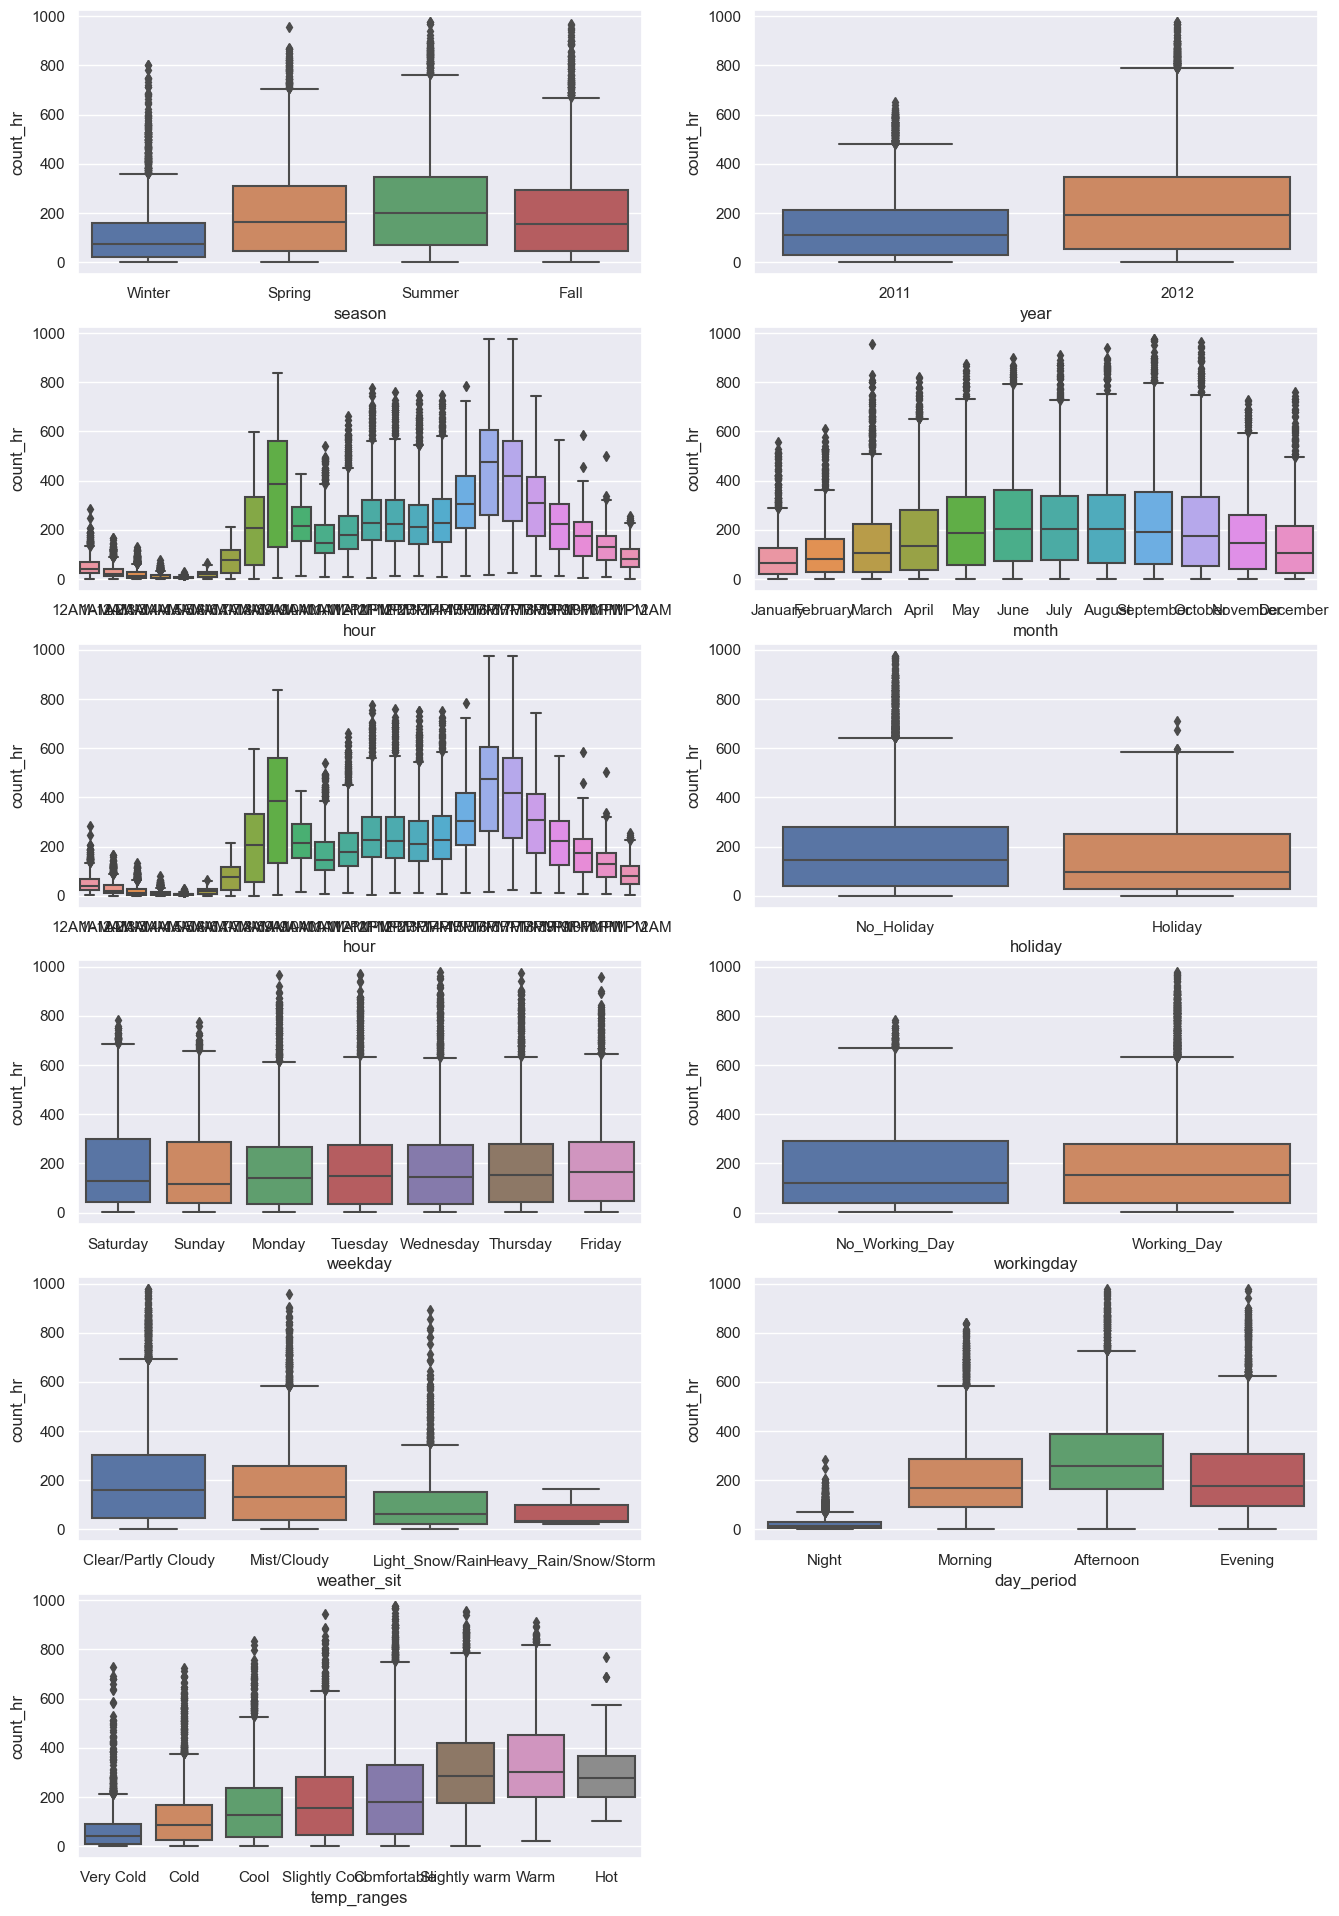

<Figure size 1200x300 with 0 Axes>

In [62]:
# Box plots for Categorical Target Variable "cnt" and continuous predictors
CategoricalColsList=['season', 'year', 'hour', 'month','hour','holiday', 'weekday', 'workingday', 'weather_sit','day_period', 'temp_ranges']

plt.figure(figsize=(16,24))
plotnumber = 1
for i in df_hourly[CategoricalColsList]:
  plt.subplot(6,2,plotnumber)
  sns.boxplot(x=i, y='count_hr', data=df_hourly)
  plotnumber += 1
plt.show()
plt.tight_layout()

### Box-Plots interpretation
What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with cnt.

In this data, all the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test¶
Analysis of variance (ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
ANOVA Test result: Probability of H0 being true

In [63]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [64]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['season', 'year', 'hour', 'month','hour','holiday', 'weekday', 'workingday', 'weather_sit','day_period', 'temp_ranges']
FunctionAnova(inpData=df_hourly, 
              TargetVariable='count_hr', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

season is correlated with count_hr | P-Value: 7.40107139971279e-257
year is correlated with count_hr | P-Value: 7.213184208630547e-247
hour is correlated with count_hr | P-Value: 0.0
month is correlated with count_hr | P-Value: 5.505684936484358e-284
hour is correlated with count_hr | P-Value: 0.0
holiday is correlated with count_hr | P-Value: 4.5461689487233316e-05
weekday is correlated with count_hr | P-Value: 0.0018990310434750582
workingday is correlated with count_hr | P-Value: 6.524264547051995e-05
weather_sit is correlated with count_hr | P-Value: 1.7347820521803117e-81
day_period is correlated with count_hr | P-Value: 0.0
temp_ranges is correlated with count_hr | P-Value: 0.0


['season',
 'year',
 'hour',
 'month',
 'hour',
 'holiday',
 'weekday',
 'workingday',
 'weather_sit',
 'day_period',
 'temp_ranges']

**Dropping Unnecessary Columns**

In [65]:
df_hourly.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'hour',
       'holiday', 'weekday', 'workingday', 'weather_sit', 'temp_hr',
       'feel_temp_hr', 'humidity_hr', 'windspeed_hr', 'count_hr', 'day_period',
       'temp_ranges'],
      dtype='object')

In [66]:
df_hourly.drop(columns=["record_index","day_date",'day_period', 'temp_ranges'], inplace=True)

In [67]:
df_daily.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather_sit', 'temp_daily', 'feel_temp_daily',
       'humidity_daily', 'windspeed_daily', 'casual_daily', 'registered_daily',
       'count_daily'],
      dtype='object')

### Data Pre-processing for Machine Learning¶
List of steps performed on predictor variables before data can be used for machine learning

- Converting each Ordinal Categorical columns to numeric
- Converting Binary nominal Categorical columns to numeric using 1/0 mapping
- Converting all other nominal categorical columns to numeric using pd.get_dummies()
- Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms -like KNN, or Neural Networks
- In this data there is no Ordinal categorical variable which is in string format.

### One Hot Encoding

In [68]:
df_hourly = pd.get_dummies(df_hourly, drop_first=False)
df_hourly.head()

temp_hr  feel_temp_hr  humidity_hr  windspeed_hr  count_hr  season_Fall  \
0     3.28        5.5313         81.0           0.0        16            0   
1     2.34        4.8169         80.0           0.0        40            0   
2     2.34        4.8169         80.0           0.0        32            0   
3     3.28        5.5313         75.0           0.0        13            0   
4     3.28        5.5313         75.0           0.0         1            0   

   season_Spring  season_Summer  season_Winter  year_2011  ...  \
0              0              0              1          1  ...   
1              0              0              1          1  ...   
2              0              0              1          1  ...   
3              0              0              1          1  ...   
4              0              0              1          1  ...   

   weekday_Sunday  weekday_Thursday  weekday_Tuesday  weekday_Wednesday  \
0               0                 0                0                  0   
1               0                 0                0                  0   
2               0                 0                0                  0   
3               0                 0                0                  0   
4               0                 0                0                  0   

   workingday_No_Working_Day  workingday_Working_Day  \
0                          1                       0   
1                          1                       0   
2                          1                       0   
3                          1                       0   
4                          1                       0   

   weather_sit_Clear/Partly Cloudy  weather_sit_Heavy_Rain/Snow/Storm  \
0                                1                                  0   
1                                1                                  0   
2                                1                                  0   
3                                1                                  0   
4                                1                                  0   

   weather_sit_Light_Snow/Rain  weather_sit_Mist/Cloudy  
0                            0                        0  
1                            0                        0  
2                            0                        0  
3                            0                        0  
4                            0                        0  

[5 rows x 62 columns]

In [69]:
df_hourly.columns

Index(['temp_hr', 'feel_temp_hr', 'humidity_hr', 'windspeed_hr', 'count_hr',
       'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter',
       'year_2011', 'year_2012', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'hour_10AM-11AM', 'hour_10PM-11PM',
       'hour_11AM-12PM', 'hour_11PM-12AM', 'hour_12AM-1AM', 'hour_12PM-1PM',
       'hour_1AM-2AM', 'hour_1PM-2PM', 'hour_2AM-3AM', 'hour_2PM-3PM',
       'hour_3AM-4AM', 'hour_3PM-4PM', 'hour_4AM-5AM', 'hour_4PM-5PM',
       'hour_5AM-6AM', 'hour_5PM-6PM', 'hour_6AM-7AM', 'hour_6PM-7PM',
       'hour_7AM-8AM', 'hour_7PM-8PM', 'hour_8AM-9AM', 'hour_8PM-9PM',
       'hour_9AM-10AM', 'hour_9PM-10PM', 'holiday_Holiday',
       'holiday_No_Holiday', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday

In [70]:
df_hourly=df_hourly[['season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'year_2011', 'year_2012', 'month_April',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'hour_10AM-11AM', 'hour_10PM-11PM',
       'hour_11AM-12PM', 'hour_11PM-12AM', 'hour_12AM-1AM', 'hour_12PM-1PM',
       'hour_1AM-2AM', 'hour_1PM-2PM', 'hour_2AM-3AM', 'hour_2PM-3PM',
       'hour_3AM-4AM', 'hour_3PM-4PM', 'hour_4AM-5AM', 'hour_4PM-5PM',
       'hour_5AM-6AM', 'hour_5PM-6PM', 'hour_6AM-7AM', 'hour_6PM-7PM',
       'hour_7AM-8AM', 'hour_7PM-8PM', 'hour_8AM-9AM', 'hour_8PM-9PM',
       'hour_9AM-10AM', 'hour_9PM-10PM', 'holiday_Holiday',
       'holiday_No_Holiday', 'weekday_Sunday',  'weekday_Monday',
       'weekday_Tuesday','weekday_Wednesday', 'weekday_Thursday','weekday_Friday','weekday_Saturday', 'workingday_No_Working_Day',
       'workingday_Working_Day', 'weather_sit_Clear/Partly Cloudy',
       'weather_sit_Heavy_Rain/Snow/Storm', 'weather_sit_Light_Snow/Rain',
       'weather_sit_Mist/Cloudy','temp_hr', 'feel_temp_hr', 'humidity_hr',
       'windspeed_hr', 'count_hr']]

In [71]:
df_hourly.columns

Index(['season_Fall', 'season_Spring', 'season_Summer', 'season_Winter',
       'year_2011', 'year_2012', 'month_April', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September', 'hour_10AM-11AM', 'hour_10PM-11PM',
       'hour_11AM-12PM', 'hour_11PM-12AM', 'hour_12AM-1AM', 'hour_12PM-1PM',
       'hour_1AM-2AM', 'hour_1PM-2PM', 'hour_2AM-3AM', 'hour_2PM-3PM',
       'hour_3AM-4AM', 'hour_3PM-4PM', 'hour_4AM-5AM', 'hour_4PM-5PM',
       'hour_5AM-6AM', 'hour_5PM-6PM', 'hour_6AM-7AM', 'hour_6PM-7PM',
       'hour_7AM-8AM', 'hour_7PM-8PM', 'hour_8AM-9AM', 'hour_8PM-9PM',
       'hour_9AM-10AM', 'hour_9PM-10PM', 'holiday_Holiday',
       'holiday_No_Holiday', 'weekday_Sunday', 'weekday_Monday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday',
       'weekday_Friday', 'weekday_Saturday', 'workingday_No_Working_Day',
       'workingd

### Handling Outliers

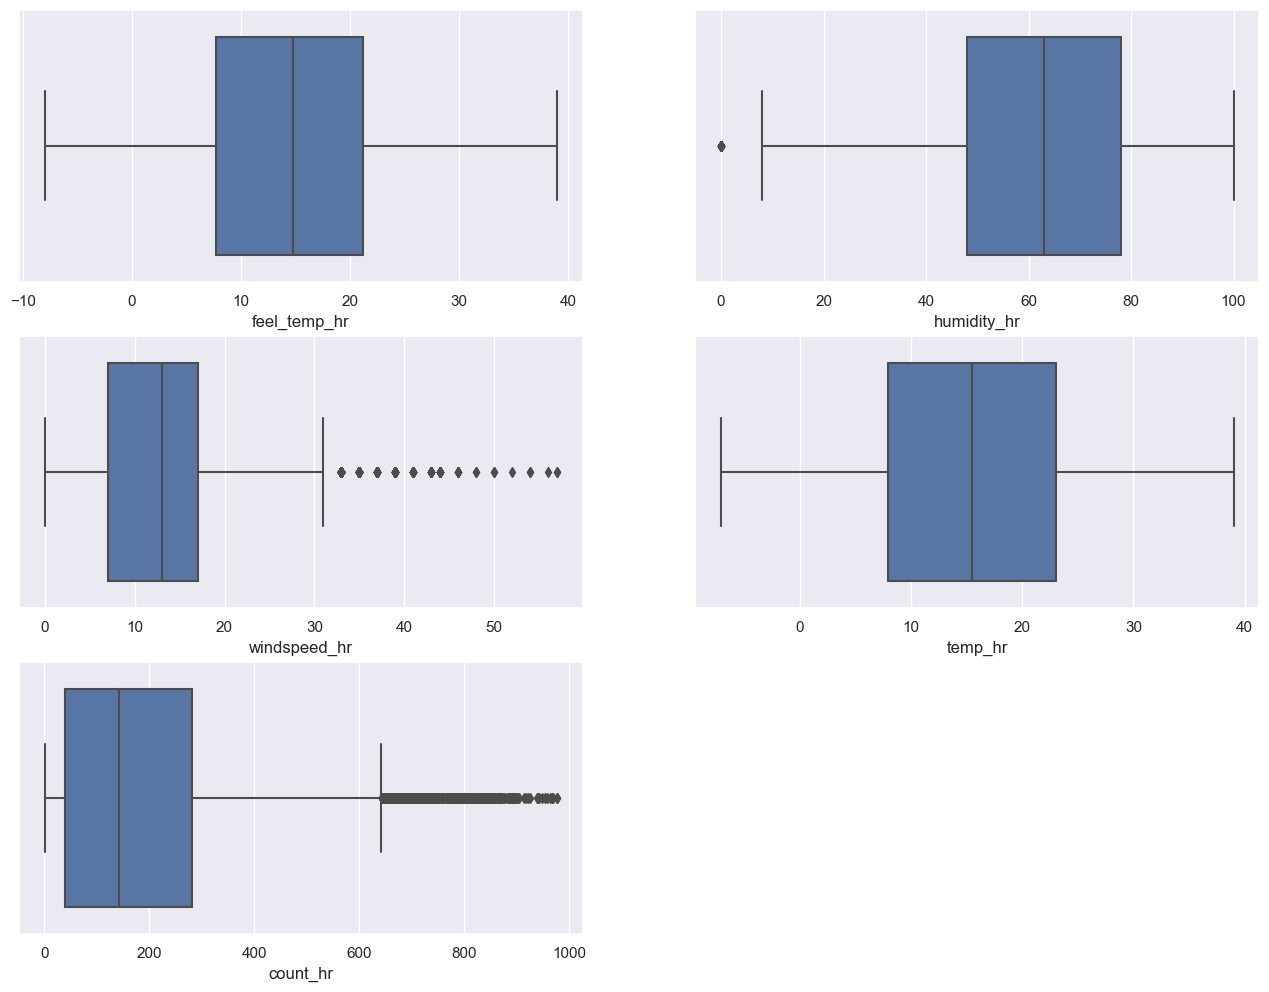

<Figure size 1200x300 with 0 Axes>

In [72]:
plt.figure(figsize=(16,12))
plotnumber = 1
for i in df_hourly[['feel_temp_hr', 'humidity_hr', 'windspeed_hr','temp_hr',
       'count_hr']]:
  plt.subplot(3,2,plotnumber)
  sns.boxplot(x=i,data=df_hourly)
  plotnumber += 1
plt.show()
plt.tight_layout()

In [73]:
for column in df_hourly[['humidity_hr', 'windspeed_hr','count_hr']]:
    df_hourly[column]=np.where(df_hourly[column] < df_hourly[column].quantile(0.05), df_hourly[column].quantile(0.05), df_hourly[column])
    df_hourly[column]=np.where(df_hourly[column] > df_hourly[column].quantile(0.95), df_hourly[column].quantile(0.95), df_hourly[column])

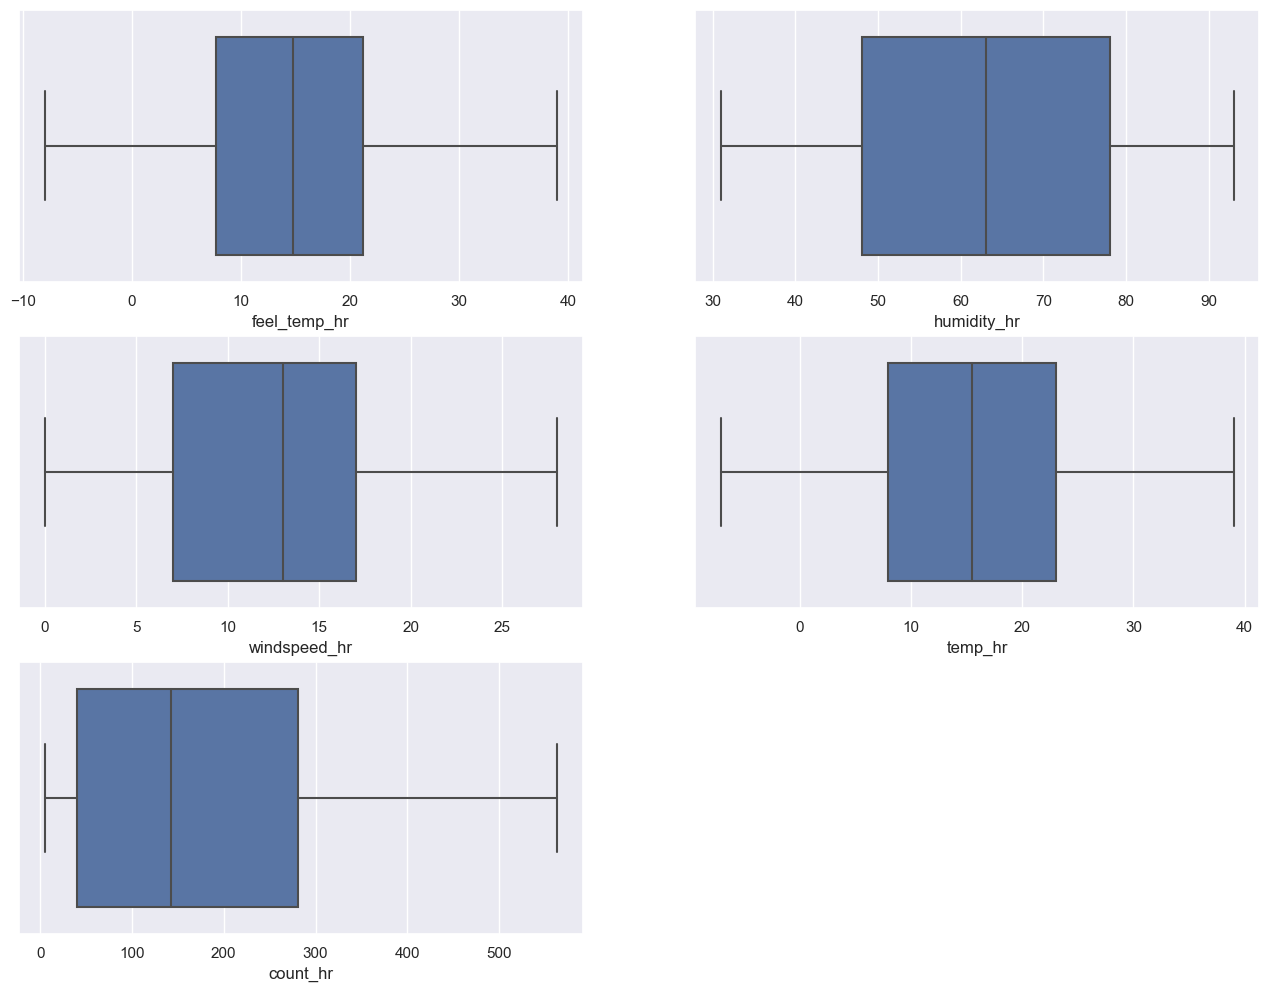

<Figure size 1200x300 with 0 Axes>

In [74]:
plt.figure(figsize=(16,12))
plotnumber = 1
for i in df_hourly[['feel_temp_hr', 'humidity_hr', 'windspeed_hr','temp_hr',
       'count_hr']]:
  plt.subplot(3,2,plotnumber)
  sns.boxplot(x=i,data=df_hourly)
  plotnumber += 1
plt.show()
plt.tight_layout()

In [75]:
df_hourly.describe()

season_Fall  season_Spring  season_Summer  season_Winter  \
count  17379.000000   17379.000000   17379.000000   17379.000000   
mean       0.243512       0.253697       0.258703       0.244088   
std        0.429214       0.435139       0.437935       0.429557   
min        0.000000       0.000000       0.000000       0.000000   
25%        0.000000       0.000000       0.000000       0.000000   
50%        0.000000       0.000000       0.000000       0.000000   
75%        0.000000       1.000000       1.000000       0.000000   
max        1.000000       1.000000       1.000000       1.000000   

          year_2011     year_2012   month_April  month_August  month_December  \
count  17379.000000  17379.000000  17379.000000  17379.000000    17379.000000   
mean       0.497439      0.502561      0.082686      0.084873        0.085333   
std        0.500008      0.500008      0.275415      0.278700        0.279384   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000      0.000000        0.000000   
50%        0.000000      1.000000      0.000000      0.000000        0.000000   
75%        1.000000      1.000000      0.000000      0.000000        0.000000   
max        1.000000      1.000000      1.000000      1.000000        1.000000   

       month_February  ...  workingday_Working_Day  \
count    17379.000000  ...            17379.000000   
mean         0.077162  ...                0.682721   
std          0.266856  ...                0.465431   
min          0.000000  ...                0.000000   
25%          0.000000  ...                0.000000   
50%          0.000000  ...                1.000000   
75%          0.000000  ...                1.000000   
max          1.000000  ...                1.000000   

       weather_sit_Clear/Partly Cloudy  weather_sit_Heavy_Rain/Snow/Storm  \
count                     17379.000000                       17379.000000   
mean                          0.656712                           0.000173   
std                           0.474820                           0.013138   
min                           0.000000                           0.000000   
25%                           0.000000                           0.000000   
50%                           1.000000                           0.000000   
75%                           1.000000                           0.000000   
max                           1.000000                           1.000000   

       weather_sit_Light_Snow/Rain  weather_sit_Mist/Cloudy       temp_hr  \
count                 17379.000000             17379.000000  17379.000000   
mean                      0.081650                 0.261465     15.358397   
std                       0.273839                 0.439445      9.050138   
min                       0.000000                 0.000000     -7.060000   
25%                       0.000000                 0.000000      7.980000   
50%                       0.000000                 0.000000     15.500000   
75%                       0.000000                 1.000000     23.020000   
max                       1.000000                 1.000000     39.000000   

       feel_temp_hr   humidity_hr  windspeed_hr      count_hr  
count   17379.00000  17379.000000  17379.000000  17379.000000  
mean       14.36143     62.843950     12.518189    183.424299  
std         8.07696     18.524961      7.645711    164.297581  
min        -8.00000     31.000000      0.000000      5.000000  
25%         7.66510     48.000000      7.001500     40.000000  
50%        14.78560     63.000000     12.998000    142.000000  
75%        21.19640     78.000000     16.997900    281.000000  
max        39.00000     93.000000     27.999300    563.100000  

[8 rows x 62 columns]

### Scaling the Data

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
std = StandardScaler()

In [78]:
scaled_hourly = std.fit_transform(df_hourly)

In [79]:
scaled_hourly

array([[-0.56736102, -0.5830423 , -0.59075125, ...,  0.98011396,
        -1.63732958, -1.01906014],
       [-0.56736102, -0.5830423 , -0.59075125, ...,  0.92613119,
        -1.63732958, -0.87297953],
       [-0.56736102, -0.5830423 , -0.59075125, ...,  0.92613119,
        -1.63732958, -0.92167307],
       ...,
       [-0.56736102, -0.5830423 , -0.59075125, ..., -0.15352429,
        -0.19839002, -0.56864494],
       [-0.56736102, -0.5830423 , -0.59075125, ..., -0.36945538,
        -0.46041373, -0.745159  ],
       [-0.56736102, -0.5830423 , -0.59075125, ...,  0.11638958,
        -0.46041373, -0.81819931]])

In [80]:
scaled_df_hourly= pd.DataFrame(data = scaled_hourly, columns = df_hourly.columns)

In [81]:
scaled_df_hourly.describe()

season_Fall  season_Spring  season_Summer  season_Winter  \
count  1.737900e+04   1.737900e+04   1.737900e+04   1.737900e+04   
mean   4.901177e-14  -1.523385e-14   1.515119e-14   3.816420e-14   
std    1.000029e+00   1.000029e+00   1.000029e+00   1.000029e+00   
min   -5.673610e-01  -5.830423e-01  -5.907512e-01  -5.682471e-01   
25%   -5.673610e-01  -5.830423e-01  -5.907512e-01  -5.682471e-01   
50%   -5.673610e-01  -5.830423e-01  -5.907512e-01  -5.682471e-01   
75%   -5.673610e-01   1.715141e+00   1.692760e+00  -5.682471e-01   
max    1.762546e+00   1.715141e+00   1.692760e+00   1.759798e+00   

          year_2011     year_2012   month_April  month_August  month_December  \
count  1.737900e+04  1.737900e+04  1.737900e+04  1.737900e+04    1.737900e+04   
mean   3.724473e-14 -3.724473e-14  2.645221e-14 -2.120546e-14   -1.970689e-14   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00    1.000029e+00   
min   -9.948919e-01 -1.005134e+00 -3.002320e-01 -3.045389e-01   -3.054405e-01   
25%   -9.948919e-01 -1.005134e+00 -3.002320e-01 -3.045389e-01   -3.054405e-01   
50%   -9.948919e-01  9.948919e-01 -3.002320e-01 -3.045389e-01   -3.054405e-01   
75%    1.005134e+00  9.948919e-01 -3.002320e-01 -3.045389e-01   -3.054405e-01   
max    1.005134e+00  9.948919e-01  3.330758e+00  3.283652e+00    3.273960e+00   

       month_February  ...  workingday_Working_Day  \
count    1.737900e+04  ...            1.737900e+04   
mean    -1.381100e-15  ...            1.067038e-15   
std      1.000029e+00  ...            1.000029e+00   
min     -2.891607e-01  ...           -1.466900e+00   
25%     -2.891607e-01  ...           -1.466900e+00   
50%     -2.891607e-01  ...            6.817098e-01   
75%     -2.891607e-01  ...            6.817098e-01   
max      3.458284e+00  ...            6.817098e-01   

       weather_sit_Clear/Partly Cloudy  weather_sit_Heavy_Rain/Snow/Storm  \
count                     1.737900e+04                       1.737900e+04   
mean                     -4.313215e-15                       7.097533e-16   
std                       1.000029e+00                       1.000029e+00   
min                      -1.383115e+00                      -1.313971e-02   
25%                      -1.383115e+00                      -1.313971e-02   
50%                       7.230057e-01                      -1.313971e-02   
75%                       7.230057e-01                      -1.313971e-02   
max                       7.230057e-01                       7.610519e+01   

       weather_sit_Light_Snow/Rain  weather_sit_Mist/Cloudy       temp_hr  \
count                 1.737900e+04             1.737900e+04  1.737900e+04   
mean                 -4.857588e-15            -2.655426e-15  3.366380e-16   
std                   1.000029e+00             1.000029e+00  1.000029e+00   
min                  -2.981774e-01            -5.950058e-01 -2.477205e+00   
25%                  -2.981774e-01            -5.950058e-01 -8.153035e-01   
50%                  -2.981774e-01            -5.950058e-01  1.564696e-02   
75%                  -2.981774e-01             1.680656e+00  8.465975e-01   
max                   3.353708e+00             1.680656e+00  2.612367e+00   

       feel_temp_hr   humidity_hr  windspeed_hr      count_hr  
count  1.737900e+04  1.737900e+04  1.737900e+04  1.737900e+04  
mean  -8.758362e-16 -1.353777e-16  4.795379e-16  1.263734e-16  
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00  
min   -2.768625e+00 -1.719025e+00 -1.637330e+00 -1.086014e+00  
25%   -8.290895e-01 -8.013176e-01 -7.215611e-01 -8.729795e-01  
50%    5.251758e-02  8.424034e-03  6.275736e-02 -2.521370e-01  
75%    8.462549e-01  8.181656e-01  5.859284e-01  5.939132e-01  
max    3.050563e+00  1.627907e+00  2.024868e+00  2.310969e+00  

[8 rows x 62 columns]

In [82]:
scaled_df_hourly.iloc[:, :-1]

season_Fall  season_Spring  season_Summer  season_Winter  year_2011  \
0        -0.567361      -0.583042      -0.590751       1.759798   1.005134   
1        -0.567361      -0.583042      -0.590751       1.759798   1.005134   
2        -0.567361      -0.583042      -0.590751       1.759798   1.005134   
3        -0.567361      -0.583042      -0.590751       1.759798   1.005134   
4        -0.567361      -0.583042      -0.590751       1.759798   1.005134   
...            ...            ...            ...            ...        ...   
17374    -0.567361      -0.583042      -0.590751       1.759798  -0.994892   
17375    -0.567361      -0.583042      -0.590751       1.759798  -0.994892   
17376    -0.567361      -0.583042      -0.590751       1.759798  -0.994892   
17377    -0.567361      -0.583042      -0.590751       1.759798  -0.994892   
17378    -0.567361      -0.583042      -0.590751       1.759798  -0.994892   

       year_2012  month_April  month_August  month_December  month_February  \
0      -1.005134    -0.300232     -0.304539       -0.305441       -0.289161   
1      -1.005134    -0.300232     -0.304539       -0.305441       -0.289161   
2      -1.005134    -0.300232     -0.304539       -0.305441       -0.289161   
3      -1.005134    -0.300232     -0.304539       -0.305441       -0.289161   
4      -1.005134    -0.300232     -0.304539       -0.305441       -0.289161   
...          ...          ...           ...             ...             ...   
17374   0.994892    -0.300232     -0.304539        3.273960       -0.289161   
17375   0.994892    -0.300232     -0.304539        3.273960       -0.289161   
17376   0.994892    -0.300232     -0.304539        3.273960       -0.289161   
17377   0.994892    -0.300232     -0.304539        3.273960       -0.289161   
17378   0.994892    -0.300232     -0.304539        3.273960       -0.289161   

       ...  workingday_No_Working_Day  workingday_Working_Day  \
0      ...                    1.46690                -1.46690   
1      ...                    1.46690                -1.46690   
2      ...                    1.46690                -1.46690   
3      ...                    1.46690                -1.46690   
4      ...                    1.46690                -1.46690   
...    ...                        ...                     ...   
17374  ...                   -0.68171                 0.68171   
17375  ...                   -0.68171                 0.68171   
17376  ...                   -0.68171                 0.68171   
17377  ...                   -0.68171                 0.68171   
17378  ...                   -0.68171                 0.68171   

       weather_sit_Clear/Partly Cloudy  weather_sit_Heavy_Rain/Snow/Storm  \
0                             0.723006                           -0.01314   
1                             0.723006                           -0.01314   
2                             0.723006                           -0.01314   
3                             0.723006                           -0.01314   
4                             0.723006                           -0.01314   
...                                ...                                ...   
17374                        -1.383115                           -0.01314   
17375                        -1.383115                           -0.01314   
17376                         0.723006                           -0.01314   
17377                         0.723006                           -0.01314   
17378                         0.723006                           -0.01314   

       weather_sit_Light_Snow/Rain  weather_sit_Mist/Cloudy   temp_hr  \
0                        -0.298177                -0.595006 -1.334648   
1                        -0.298177                -0.595006 -1.438516   
2                        -0.298177                -0.595006 -1.438516   
3                        -0.298177                -0.595006 -1.334648   
4                        -0.298177                

### Splitting the data into training and test sets

In [83]:
# Importing Necessary Libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [84]:
#Step 1 Independent and dependent variable creation
X=scaled_df_hourly.iloc[:, :-1] ## X variable contains all inputs
y=scaled_df_hourly.count_hr ## y is output

In [85]:
y

0       -1.019060
1       -0.872980
2       -0.921673
3       -1.037320
4       -1.086014
           ...   
17374   -0.392131
17375   -0.574732
17376   -0.568645
17377   -0.745159
17378   -0.818199
Name: count_hr, Length: 17379, dtype: float64

In [86]:
# Step 2 Traning and testing data creation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=35)

In [87]:
y_train

15675    0.058284
6655    -0.063449
15833    0.204365
15668   -0.538211
1619    -0.818199
           ...   
2792    -1.037320
15808    0.533046
15393    1.439963
9143    -0.696465
5833     1.032155
Name: count_hr, Length: 13034, dtype: float64

### Feature Importance

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [89]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

Text(0.5, 0, 'Feature Importance')

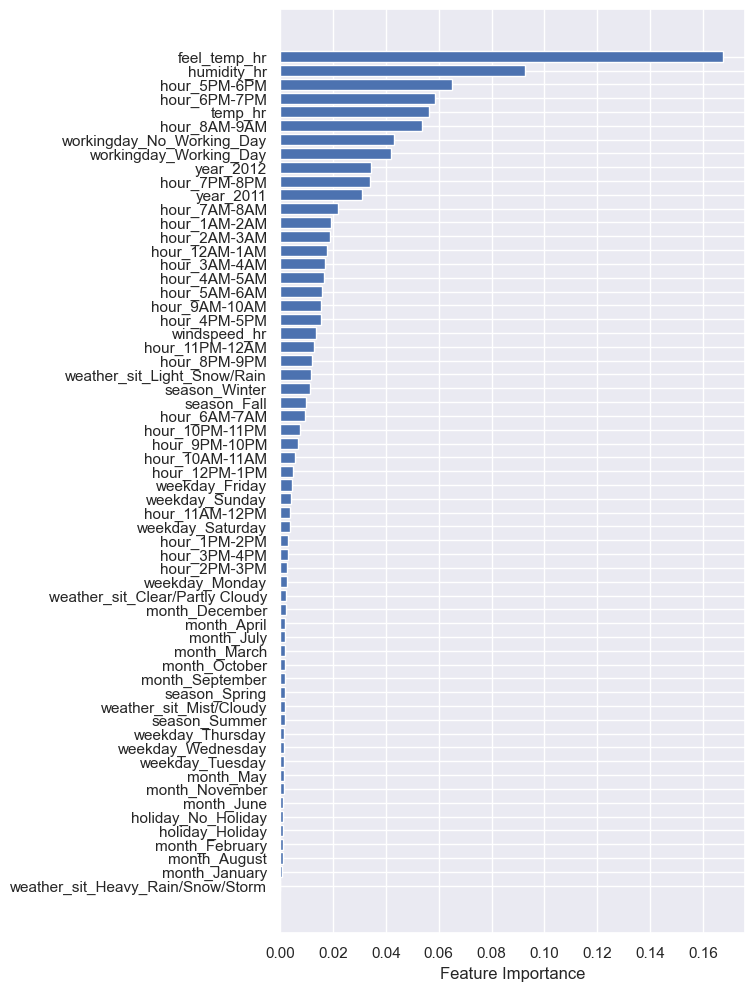

In [90]:
plt.figure(figsize=(6,12))
sort = rf.feature_importances_.argsort()
plt.barh(scaled_df_hourly.iloc[:, :-1].columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [91]:
scaled_df_hourly.iloc[:, :-1].columns[sort]

Index(['weather_sit_Heavy_Rain/Snow/Storm', 'month_January', 'month_August',
       'month_February', 'holiday_Holiday', 'holiday_No_Holiday', 'month_June',
       'month_November', 'month_May', 'weekday_Tuesday', 'weekday_Wednesday',
       'weekday_Thursday', 'season_Summer', 'weather_sit_Mist/Cloudy',
       'season_Spring', 'month_September', 'month_October', 'month_March',
       'month_July', 'month_April', 'month_December',
       'weather_sit_Clear/Partly Cloudy', 'weekday_Monday', 'hour_2PM-3PM',
       'hour_3PM-4PM', 'hour_1PM-2PM', 'weekday_Saturday', 'hour_11AM-12PM',
       'weekday_Sunday', 'weekday_Friday', 'hour_12PM-1PM', 'hour_10AM-11AM',
       'hour_9PM-10PM', 'hour_10PM-11PM', 'hour_6AM-7AM', 'season_Fall',
       'season_Winter', 'weather_sit_Light_Snow/Rain', 'hour_8PM-9PM',
       'hour_11PM-12AM', 'windspeed_hr', 'hour_4PM-5PM', 'hour_9AM-10AM',
       'hour_5AM-6AM', 'hour_4AM-5AM', 'hour_3AM-4AM', 'hour_12AM-1AM',
       'hour_2AM-3AM', 'hour_1AM-2AM', 'hour

In [92]:
FI_hourly=scaled_df_hourly[['weekday_Saturday', 'hour_11AM-12PM', 'weekday_Sunday',
       'weekday_Friday', 'hour_12PM-1PM', 'hour_10AM-11AM', 'hour_9PM-10PM',
       'hour_10PM-11PM', 'season_Fall', 'hour_6AM-7AM', 'hour_8PM-9PM',
       'season_Winter', 'weather_sit_Light_Snow/Rain', 'windspeed_hr',
       'hour_11PM-12AM', 'hour_9AM-10AM', 'hour_4PM-5PM', 'hour_5AM-6AM',
       'hour_4AM-5AM', 'hour_3AM-4AM', 'hour_12AM-1AM', 'hour_2AM-3AM',
       'hour_1AM-2AM', 'hour_7AM-8AM', 'year_2011', 'hour_7PM-8PM',
       'year_2012', 'workingday_Working_Day', 'workingday_No_Working_Day',
       'hour_8AM-9AM', 'temp_hr', 'hour_6PM-7PM', 'hour_5PM-6PM',
       'humidity_hr', 'feel_temp_hr']]
FI_hourly.columns

Index(['weekday_Saturday', 'hour_11AM-12PM', 'weekday_Sunday',
       'weekday_Friday', 'hour_12PM-1PM', 'hour_10AM-11AM', 'hour_9PM-10PM',
       'hour_10PM-11PM', 'season_Fall', 'hour_6AM-7AM', 'hour_8PM-9PM',
       'season_Winter', 'weather_sit_Light_Snow/Rain', 'windspeed_hr',
       'hour_11PM-12AM', 'hour_9AM-10AM', 'hour_4PM-5PM', 'hour_5AM-6AM',
       'hour_4AM-5AM', 'hour_3AM-4AM', 'hour_12AM-1AM', 'hour_2AM-3AM',
       'hour_1AM-2AM', 'hour_7AM-8AM', 'year_2011', 'hour_7PM-8PM',
       'year_2012', 'workingday_Working_Day', 'workingday_No_Working_Day',
       'hour_8AM-9AM', 'temp_hr', 'hour_6PM-7PM', 'hour_5PM-6PM',
       'humidity_hr', 'feel_temp_hr'],
      dtype='object')

In [93]:
X=FI_hourly
y=scaled_df_hourly.count_hr ## y is output

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Linear Regression Model

In [95]:
# Step 3 Creating model
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
LR_y_predict=LR.predict(X_test)

In [96]:
LR_y_train_predict=LR.predict(X_train)

In [97]:
y_test # Actual values

12830    1.470397
8688    -0.580818
7091    -1.086014
12230    2.085153
431     -1.037320
           ...   
12749   -0.099970
11476    0.186105
12847    2.267754
16721    0.782601
9511    -0.678205
Name: count_hr, Length: 5214, dtype: float64

In [98]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
LR_r2score_test=r2_score(y_test,LR_y_predict)
LR_r2score_test

0.697606558292033

In [99]:
LR_train_score=r2_score(y_train,LR_y_train_predict)
LR_train_score

0.7024119949092082

In [100]:
import math
print(mean_squared_error(y_test,LR_y_predict))
print(math.sqrt(mean_squared_error(y_test,LR_y_predict))) # root mean squared

0.2946815761937516
0.5428458125414174


In [101]:
print(mean_absolute_error(y_test,LR_y_predict))

0.4149329614149635


In [102]:
LR_adjusted_r2_score = 1 - (((1-LR_r2score_test)*(220-1))/(220-10-1))

In [103]:
LR_adjusted_r2_score

0.683137972564379

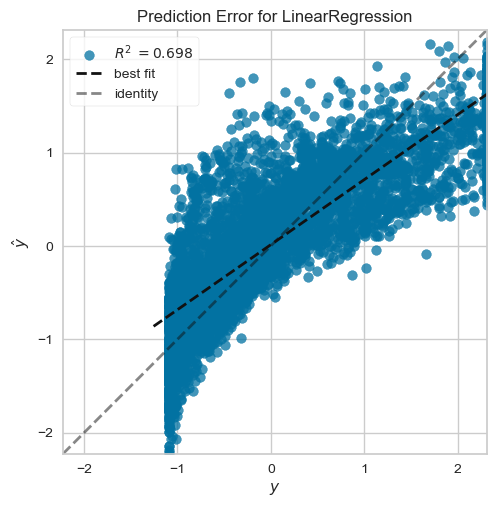

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [104]:
from yellowbrick.regressor import PredictionError
visualizer_LR = PredictionError(LR)

visualizer_LR.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_LR.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_LR.show()                 # Finalize and render the figure

## Decision Tree

In [105]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

In [106]:
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [107]:
DT_y_test_predict=DT.predict(X_test)

In [108]:
DT_test_r2_score = r2_score(y_test,DT_y_test_predict)
DT_test_r2_score

0.8471105444072691

In [109]:
DT_y_train_predict=DT.predict(X_train)

DT_train_r2_score = r2_score(y_train,DT_y_train_predict)
DT_train_r2_score

0.9995414906580586

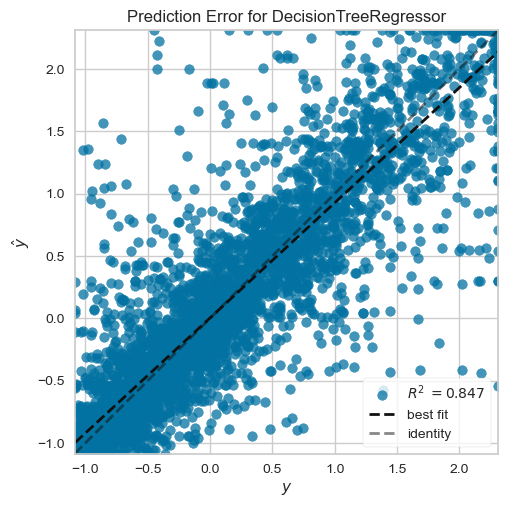

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [110]:
visualizer_DT = PredictionError(DT)

visualizer_DT.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_DT.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_DT.show()        

## Random Forest Regressor

In [111]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

In [112]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [113]:
RF_y_predict=RF.predict(X_test)

In [114]:
RF_test_r2_score = r2_score(y_test,RF_y_predict)
RF_test_r2_score

0.9183051382516173

In [115]:
RF_y_train_predict=RF.predict(X_train)

RF_train_r2_score = r2_score(y_train,RF_y_train_predict)
RF_train_r2_score

0.9873989949419233

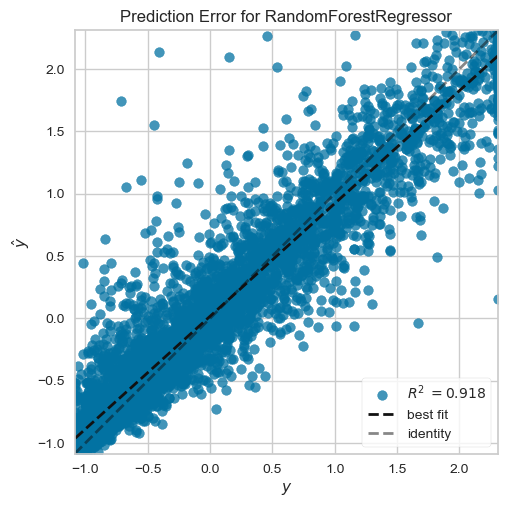

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [116]:
visualizer_RF = PredictionError(RF)

visualizer_RF.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_RF.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_RF.show()  

## Gradient Boosting

In [117]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor() ## object creation
gbr.fit(X_train,y_train) ## fitting the data

GradientBoostingRegressor()

In [118]:
gbr_y_train_predict = gbr.predict(X_train)

In [119]:
gbr_y_test_predict = gbr.predict(X_test)

In [120]:
gbr_r2_value_test = r2_score(y_test,gbr_y_test_predict)
gbr_r2_value_test

0.7837345344627509

In [121]:
gbr_r2_value_train = r2_score(y_train,gbr_y_train_predict)
gbr_r2_value_train

0.7898550915072744

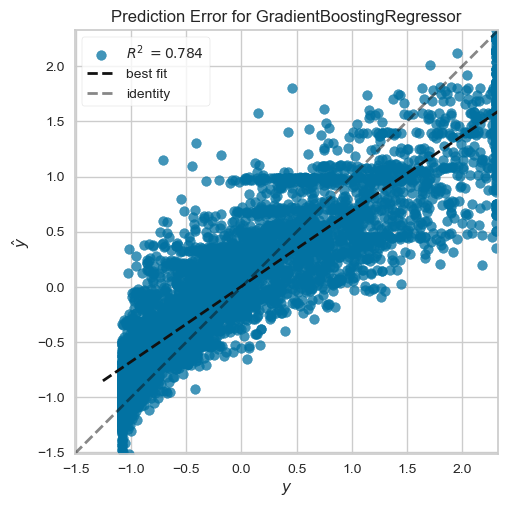

<AxesSubplot:title={'center':'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [122]:
visualizer_gbr = PredictionError(gbr)

visualizer_gbr.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_gbr.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_gbr.show()      

## XGB Regressor

In [123]:
from xgboost import XGBRegressor#importing the model library
xgb=XGBRegressor() ## object creation
xgb.fit(X_train,y_train)# fitting the data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [124]:
xgb_y_train_predict = xgb.predict(X_train)

In [125]:
xgb_r2_value_train = r2_score(y_train,xgb_y_train_predict)
xgb_r2_value_train

0.9503087176161218

In [126]:
xgb_y_test_predict = xgb.predict(X_test)

In [127]:
xgb_r2_value_test = r2_score(y_test,xgb_y_test_predict)
xgb_r2_value_test

0.9182809821365432

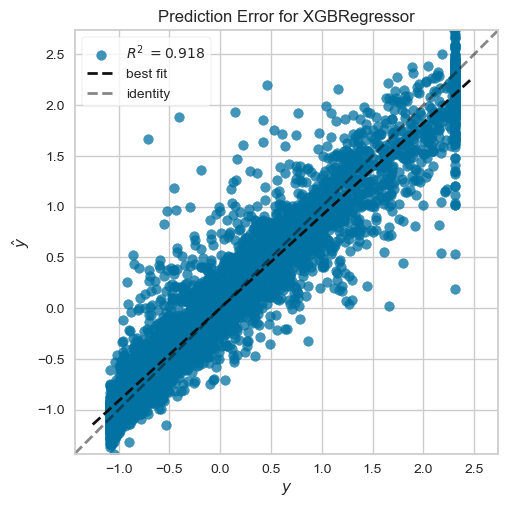

<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [128]:
visualizer_xgb = PredictionError(xgb)

visualizer_xgb .fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_xgb .score(X_test, y_test)  # Evaluate the model on the test data
visualizer_xgb .show()     

## Support Vector Regressor

In [129]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [130]:
svr_y_train_predict = svr.predict(X_train)

In [131]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [132]:
svr_r2_value_train= r2_score(y_train,svr_y_train_predict) 
svr_r2_value_train

0.9448649418219554

In [133]:
svr_adjusted_r2_train = 1 - (((1-svr_r2_value_train)*(511-1))/(511-10-1))
svr_adjusted_r2_train

0.9437622406583944

In [134]:
svr_y_test_predict = svr.predict(X_test)

In [135]:
svr_r2_value_test = r2_score(y_test,svr_y_test_predict)
svr_r2_value_test

0.93734970846808

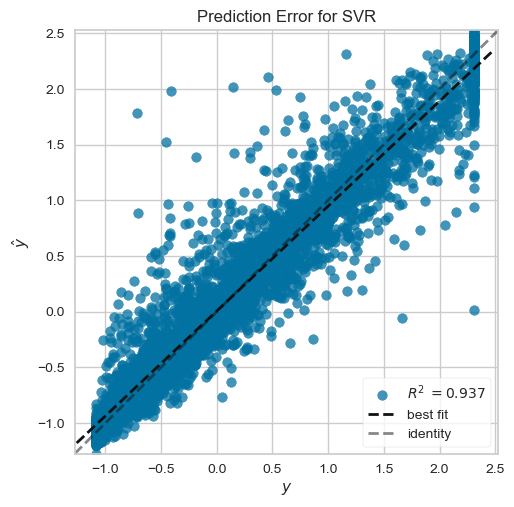

<AxesSubplot:title={'center':'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [136]:
visualizer_svr = PredictionError(svr)

visualizer_svr.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer_svr.score(X_test, y_test)  # Evaluate the model on the test data
visualizer_svr.show()